# **Billionaire Research And Exploration**

### Dự Án Phân Tích và Khám Phá dữ liệu Tỷ Phú trên thế giới

*Description: A comprehensive analysis project utilizing PySpark and the Billionaires Dataset to delve into the world of extreme wealth. The project involves data cleaning, exploration, and in-depth analysis of various attributes associated with billionaires worldwide. It encompasses observing trends, applying data scaling techniques, and implementing machine learning algorithms, such as K-means clustering and logistic regression using MLlib.*

*Language used: English*

*Technologies: **Apache Spark, PySpark, SQL, Python, Pandas, Numpy, Matplotlib, Machine Learning Models using MLlib**.*

*Author: Hoang Anh Tuan*

## Setup the environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For tree map
!pip install squarify
import squarify

In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=8a9f69bdf31e382d35fa464328e6b2c8144776160eb8165b85e3abe6e3c75ad7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [4]:
from pyspark import SparkContext
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.sql.functions import when, dayofmonth, month, to_date
from pyspark.sql.functions import sum as spark_sum

In [5]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("Billionaires_Project").getOrCreate()

# Get the SparkContext from the SparkSession
sc = spark.sparkContext

## Data Import




In [143]:
# Import from Google Drive
file_path = '/content/drive/My Drive/Research_Data/BillionairesData.csv'
bill_df = spark.read.csv(file_path, header=True, inferSchema=True)

In [144]:
# Initial look
bill_df.show(5)

+----+----------+--------------------+--------------------+---+-------------+------+------------------+--------------------+--------------------+--------------------+--------+------+------+--------------+--------+---------+--------------------+-------------+----------+--------------------+---------+----------+--------+-----------+------------------+--------------------+-----------------------------------+------------------------------------------+-----------------------+---------------------------+----------------------+------------------+----------------+-----------------+
|rank|finalWorth|            category|          personName|age|      country|  city|            source|          industries|countryOfCitizenship|        organization|selfMade|status|gender|     birthDate|lastName|firstName|               title|         date|     state|residenceStateRegion|birthYear|birthMonth|birthDay|cpi_country|cpi_change_country|         gdp_country|gross_tertiary_education_enrollment|gross_prima

In [145]:
# Print schema
bill_df.printSchema()

root
 |-- rank: integer (nullable = true)
 |-- finalWorth: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- personName: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- source: string (nullable = true)
 |-- industries: string (nullable = true)
 |-- countryOfCitizenship: string (nullable = true)
 |-- organization: string (nullable = true)
 |-- selfMade: boolean (nullable = true)
 |-- status: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthDate: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- title: string (nullable = true)
 |-- date: string (nullable = true)
 |-- state: string (nullable = true)
 |-- residenceStateRegion: string (nullable = true)
 |-- birthYear: integer (nullable = true)
 |-- birthMonth: integer (nullable = true)
 |-- birthDay: integer (nullable = true)
 |-- cpi_country: d

In [146]:
# Describe
bill_df.describe().show()

+-------+-----------------+-----------------+----------+------------------+------------------+-------+--------+-----------------+----------+--------------------+------------+------+------+-------------+-------------+---------+-------------+-------------+-------+--------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-----------------------------------+------------------------------------------+-----------------------+---------------------------+----------------------+-------------------+------------------+------------------+
|summary|             rank|       finalWorth|  category|        personName|               age|country|    city|           source|industries|countryOfCitizenship|organization|status|gender|    birthDate|     lastName|firstName|        title|         date|  state|residenceStateRegion|         birthYear|        birthMonth|         birthDay|       cpi_country|cpi_change_country|        gdp_c

In [147]:
# Count value
bill_df.count()

2640

## Explorary Data Analysis

In [ ]:
# Create a temp view for SQL command
bill_df.createOrReplaceTempView("bill_table")

### Correlation Heatmap

<ipython-input-14-aae3b39f0738>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bill_df.toPandas().corr()


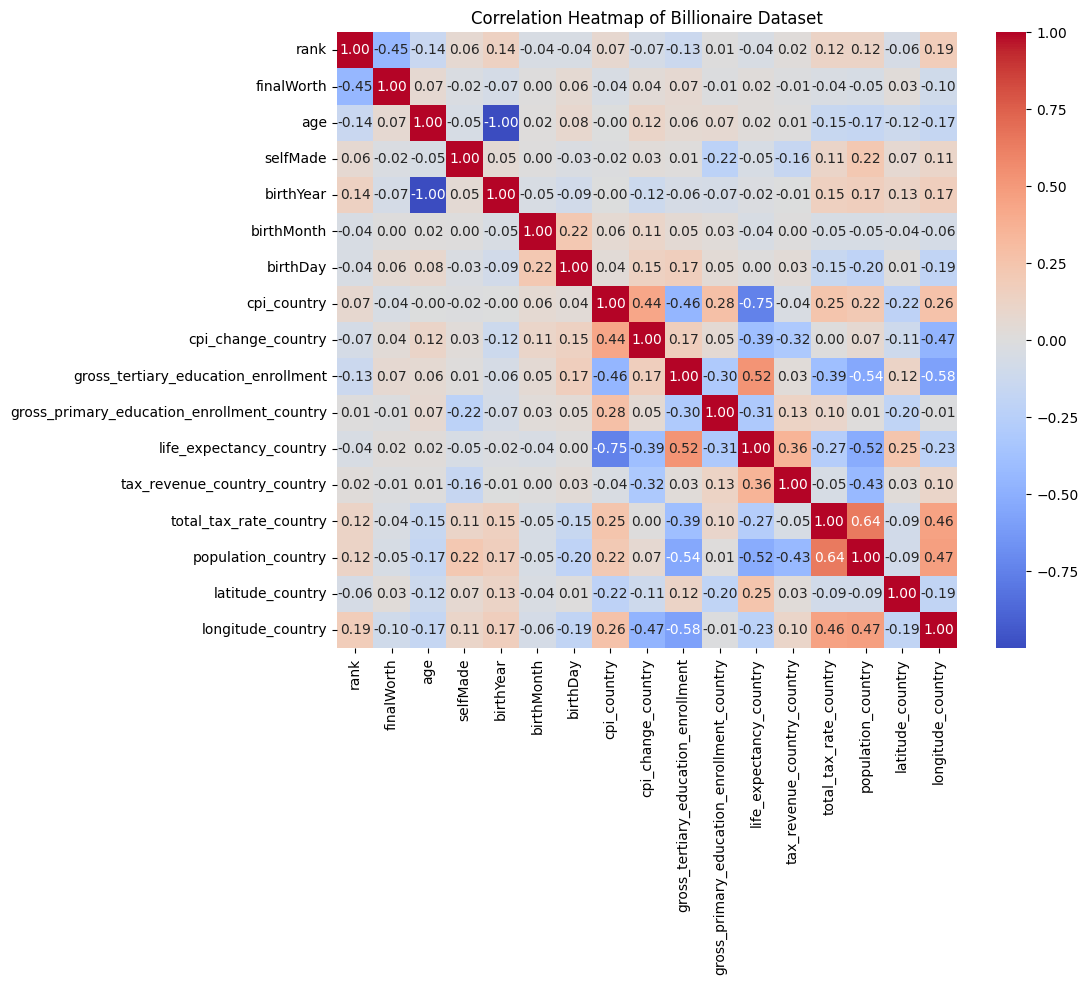

In [ ]:
correlation_matrix = bill_df.toPandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Billionaire Dataset')
plt.show()

*Here are some assumptions that I have made after observing the Correlation Heatmap of Billionaire Dataset:*

1. **There is a strong positive correlation between rank and finalWorth**. This means that the higher a country's rank, the higher its final worth.
2. **There is a weak negative correlation between rank and birthYear**. This means that the higher a country's rank, the younger its average population.
3. **There is a weak positive correlation between age and selfMade**. This means that older people are more likely to be self-made.
4. **There is a weak negative correlation between birthYear and birthMonth**. This means that people born later in the year are more likely to be born in the summer months.
5. **There is a strong positive correlation between birthDay and cpi_country**. This means that people born on later days of the month are more likely to be born in countries with higher consumer price indices.
6. **There is a weak positive correlation between cpi_change_country and gross_tertiary_education_enrollment**. This means that countries with higher rates of change in their consumer price indices tend to have higher rates of gross tertiary education enrollment.
7. **There is a strong negative correlation between life_expectancy_country and tax_revenue_country_country**. This means that countries with higher life expectancies tend to have lower tax revenue.
8. **There is a strong positive correlation between total_tax_rate_country and population_country.** This means that countries with higher total tax rates tend to have larger populations.

### **Age** Discovery

In [ ]:
# See the data of top 10 oldest people in the dataset
bill_sorted_age = bill_df.orderBy(col("age").desc())
bill_sorted_age.show(10)

+----+----------+--------------------+--------------------+---+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------+------+------+--------------+-----------------+---------+--------------------+-------------+----------+--------------------+---------+----------+--------+-----------+------------------+--------------------+-----------------------------------+------------------------------------------+-----------------------+---------------------------+----------------------+------------------+----------------+-----------------+
|rank|finalWorth|            category|          personName|age|       country|       city|              source|          industries|countryOfCitizenship|        organization|selfMade|status|gender|     birthDate|         lastName|firstName|               title|         date|     state|residenceStateRegion|birthYear|birthMonth|birthDay|cpi_country|cpi_change_country|         gdp_country|gross_tertiar

To visualize, first I have to patch all the missing value.

In [ ]:
# Find mode of 'age'
mode_age = bill_df.groupBy('age').count().orderBy(col('count').desc()).first()
mode_age

Row(age=60, count=88)

In [ ]:
# Fill missing
bill_df = bill_df.fillna(mode_age.age, subset=['age'])

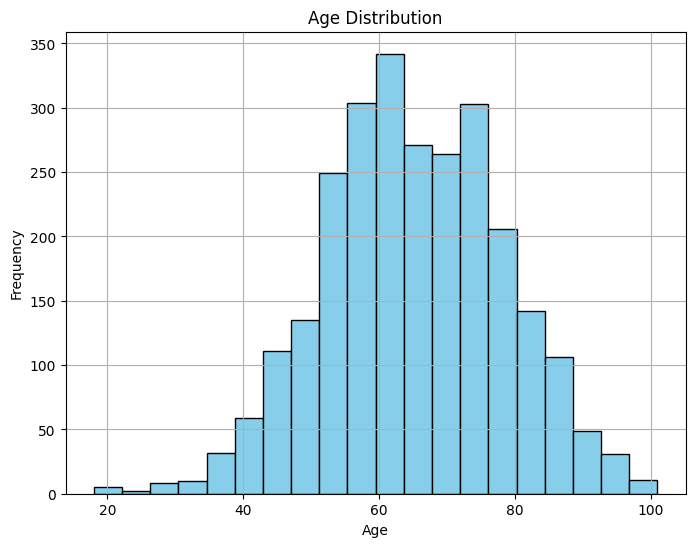

In [ ]:
# Visualize Age using Matplotlib
age_data = bill_df.select('age').rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Observation:**
1. The average age of billionaires is **between 55 and 75 years old**.
2. There are more billionaires in their **60s** than any other age group.
3. The number of billionaires **increases** as age **decreases**.
4. There are very few billionaires **under the age of 40**.
5. There are more billionaires **over the age of 80** than **under the age of 40**.  

### Discover the **category** column

In [ ]:
# Find value counts using SQL in Pyspark
sql_vc_category = '''SELECT category, COUNT(*) AS cat_counter FROM bill_table GROUP BY category ORDER BY COUNT(*) DESC'''
vc_category = spark.sql(sql_vc_category)
vc_category.show(10)

+--------------------+-----------+
|            category|cat_counter|
+--------------------+-----------+
|Finance & Investm...|        372|
|       Manufacturing|        324|
|          Technology|        314|
|    Fashion & Retail|        266|
|     Food & Beverage|        212|
|          Healthcare|        201|
|         Real Estate|        193|
|         Diversified|        187|
|              Energy|        100|
|Media & Entertain...|         91|
+--------------------+-----------+
only showing top 10 rows



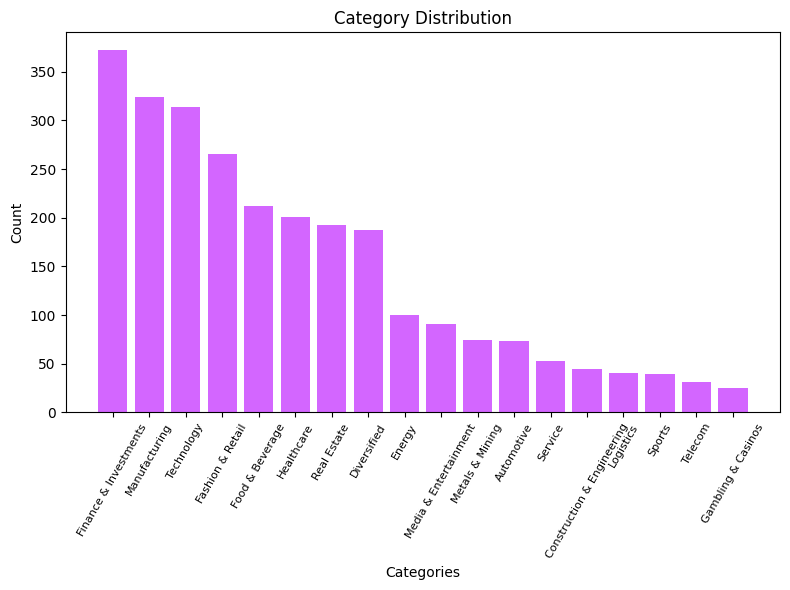

In [ ]:
# Collect data to plot
cat_labels = vc_category.select("category").rdd.flatMap(lambda x: x).collect()
cat_values = vc_category.select("cat_counter").rdd.flatMap(lambda x: x).collect()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(cat_labels, cat_values, color='#D366FF')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

**Observations:**
1. **Finance & Investments** is the category with the most billionaires.
2. **Manufactoring, Technology, Fashion & Retail, and Food & Beverage** are also popular categories for billionaires.
3. There are very few billionaires in the categories of **Sports, Telecom, Gambling & Casinos**.
4. The number of billionaires in each category is not evenly distributed.
5. There may be other factors that influence the number of billionaires in each category besides just the industry itself.

### **Country** distribution

In [ ]:
# See the value counts of each country using Spark
vc_country = bill_df.groupby("country").count().orderBy(col("count").desc())
vc_country.show(10)

+--------------+-----+
|       country|count|
+--------------+-----+
| United States|  754|
|         China|  523|
|         India|  157|
|       Germany|  102|
|United Kingdom|   82|
|        Russia|   79|
|   Switzerland|   78|
|     Hong Kong|   68|
|         Italy|   55|
|     Singapore|   46|
+--------------+-----+
only showing top 10 rows



In [ ]:
# See the value counts of each country using SparkSQL
query_vc_country = ''' SELECT country, COUNT(*) AS COUNT FROM bill_table GROUP BY country ORDER BY COUNT(*) DESC'''
spark.sql(query_vc_country).show(10)

+--------------+-----+
|       country|COUNT|
+--------------+-----+
| United States|  754|
|         China|  523|
|         India|  157|
|       Germany|  102|
|United Kingdom|   82|
|        Russia|   79|
|   Switzerland|   78|
|     Hong Kong|   68|
|         Italy|   55|
|     Singapore|   46|
+--------------+-----+
only showing top 10 rows



Patch the missing values in "**country**"

In [ ]:
# Find "mode" of country
mode_country = bill_df.groupBy('country').count().orderBy(col('count').desc()).first()
mode_country

Row(country='United States', count=754)

In [ ]:
# Replace missing values
bill_df = bill_df.fillna(mode_country.country, subset=['country'])

Visualize the **country** distribution using bar chart

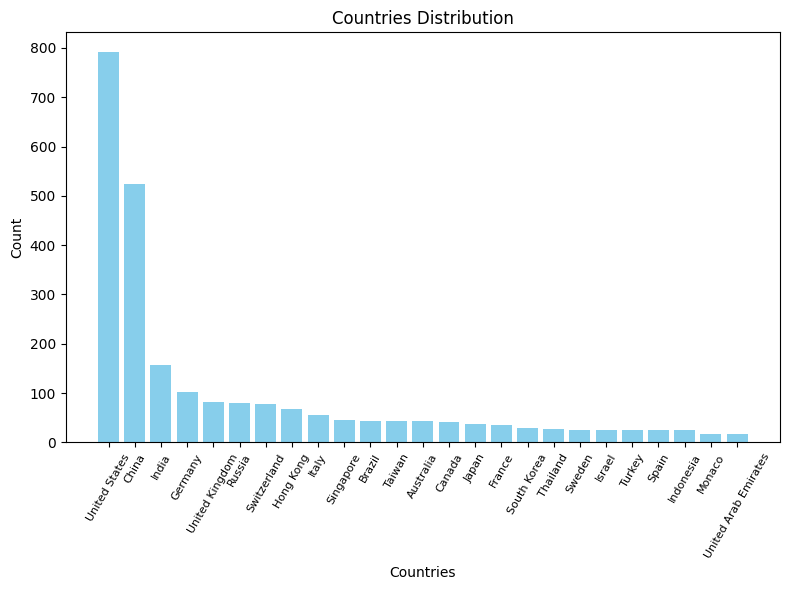

In [ ]:
# Only get the country with count greater than 15
country_counts = bill_df.groupBy("country").count().orderBy(col("count").desc())
country_counts = country_counts.filter(col('count') > 15)

# Collect data to plot
country_labels = country_counts.select("country").rdd.flatMap(lambda x: x).collect()
country_values = country_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(country_labels, country_values, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Countries Distribution')
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

**Observations:**
1. **The United States** has the most billionaires of any country in the world.
2. **China** has the second-most billionaires, followed by **India, Germany,** and **the United Kingdom.**
3. There are more billionaires in developed countries than in developing countries.
4. The number of billionaires in a country is not necessarily proportional to its population. For example, the United States has the most billionaires, but it is not the most populous country in the world.
5. There may be other factors that influence the number of billionaires in a country besides just its economic size and development.

### Discover the **countryOfCitizenship** column

In [ ]:
# Find value counts using SQL in Pyspark
sql_vc_citizen = '''SELECT countryOfCitizenship, COUNT(*) AS cz_counter FROM bill_table GROUP BY countryOfCitizenship ORDER BY COUNT(*) DESC'''
vc_citizen = spark.sql(sql_vc_citizen)
vc_citizen.show(10)

+--------------------+----------+
|countryOfCitizenship|cz_counter|
+--------------------+----------+
|       United States|       735|
|               China|       491|
|               India|       169|
|             Germany|       126|
|              Russia|       104|
|           Hong Kong|        68|
|               Italy|        64|
|              Canada|        63|
|              Taiwan|        52|
|      United Kingdom|        52|
+--------------------+----------+
only showing top 10 rows



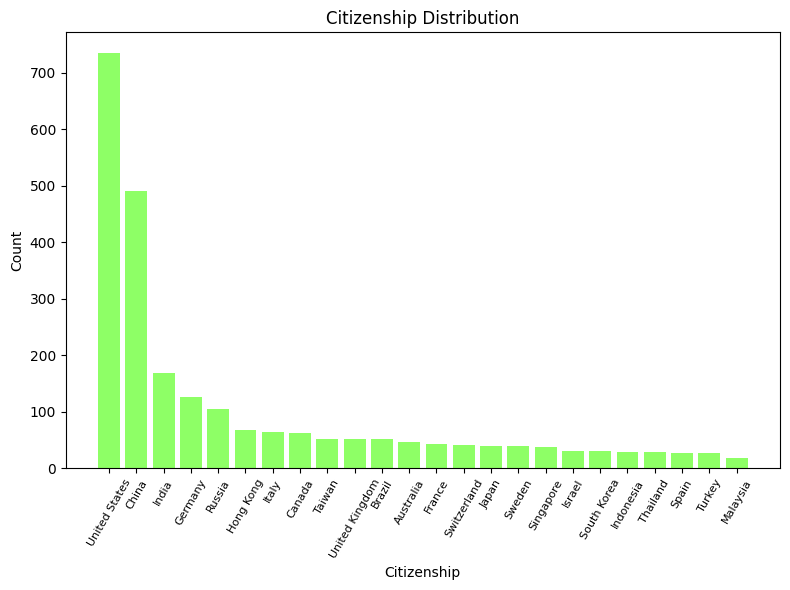

In [ ]:
# Only get the country with count greater than 15
vc_citizen = vc_citizen.filter(col('cz_counter') > 15)

# Collect data to plot
citizen_labels = vc_citizen.select("countryOfCitizenship").rdd.flatMap(lambda x: x).collect()
citizen_values = vc_citizen.select("cz_counter").rdd.flatMap(lambda x: x).collect()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(citizen_labels, citizen_values, color='#8EFF66')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.title('Citizenship Distribution')
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

### **selfMade** Billionaire or Not?

####S1 - Is it common to be a **selfMade** billionaire?

In [ ]:
# Value counts using Spark
vc_selfmade = bill_df.groupBy('selfMade').count().orderBy(col("count").desc())
vc_selfmade.show()

+--------+-----+
|selfMade|count|
+--------+-----+
|    true| 1812|
|   false|  828|
+--------+-----+



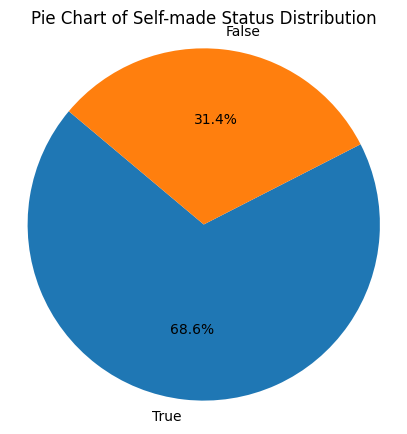

In [ ]:
# Filter the DataFrame for "true" and "false" classes and count occurrences
class_counts = vc_selfmade

# Extract labels and values for pie chart
class_labels = class_counts.select("selfMade").rdd.flatMap(lambda x: x).collect()
class_values = class_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Self-made Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

####S2 - How much worth do the **selfMade** billionaires have in total?

In [ ]:
selfmade_df = bill_df.groupBy('selfMade').sum('finalWorth')
selfmade_df = selfmade_df.withColumnRenamed('sum(finalWorth)', 'total_net_worth')

selfmade_df = selfmade_df.withColumn(
    'selfMade',
    when(col('selfMade') == 'true', 'selfmade')
    .when(col('selfMade') == 'false', 'not_selfmade')
    .otherwise('Unknown')  # You can set a default value if needed
)

selfmade_df.show()

+------------+---------------+
|    selfMade|total_net_worth|
+------------+---------------+
|    selfmade|        8091300|
|not_selfmade|        4115500|
+------------+---------------+



In [ ]:
selfmade_df = bill_df.groupBy('selfMade').sum('finalWorth')
selfmade_df = selfmade_df.withColumnRenamed('sum(finalWorth)', 'total_net_worth')
selfmade_df.show()

+--------+---------------+
|selfMade|total_net_worth|
+--------+---------------+
|    true|        8091300|
|   false|        4115500|
+--------+---------------+



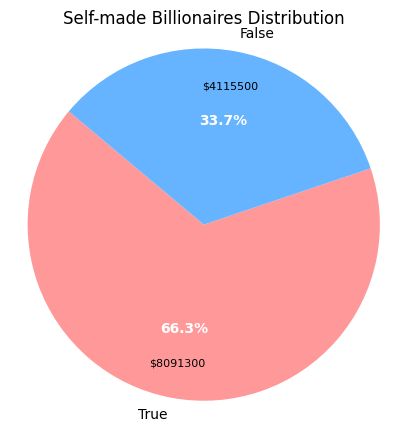

In [ ]:
selfmade_pd_df = selfmade_df.toPandas()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
colors = ['#ff9999', '#66b3ff']
wedges, texts, autotexts = plt.pie(selfmade_pd_df['total_net_worth'], labels=selfmade_pd_df['selfMade'],
                                   autopct='%1.1f%%', startangle=140, colors=colors)
plt.setp(autotexts, size=10, weight="bold", color="white")

for i, txt in enumerate(selfmade_pd_df['total_net_worth']):
    ang = (wedges[i].theta2 + wedges[i].theta1) / 2.0
    y = 0.8 * np.sin(np.deg2rad(ang))
    x = 0.8 * np.cos(np.deg2rad(ang))
    plt.text(x, y, f"${txt}", ha="center", va="center", fontsize=8)

plt.title('Self-made Billionaires Distribution')
plt.axis('equal')
plt.show()

### Which **gender** is more likely to be a billionaire?

#### G1 - Which **gender** has more billionaires?

In [ ]:
# Value counts using Spark SQL
sql_gender = ''' SELECT gender, COUNT(*) AS Gender_Count FROM bill_table GROUP BY gender ORDER BY COUNT(*) DESC'''
vc_gender = spark.sql(sql_gender)
vc_gender.show()

+------+------------+
|gender|Gender_Count|
+------+------------+
|     M|        2303|
|     F|         337|
+------+------------+



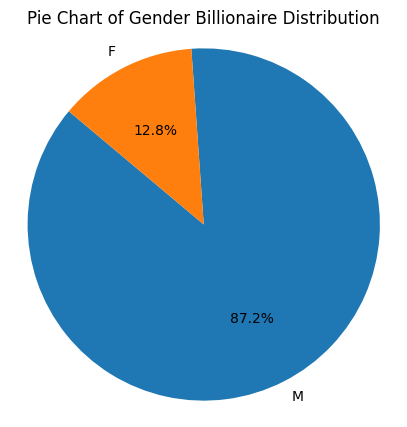

In [ ]:
# Filter the DataFrame for "each gender
gender_counts = vc_gender

# Extract labels and values for pie chart
gender_labels = gender_counts.select("gender").rdd.flatMap(lambda x: x).collect()
gender_values = gender_counts.select("Gender_Count").rdd.flatMap(lambda x: x).collect()

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(gender_values, labels=gender_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Gender Billionaire Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### G2 - Which **gender** has more net worth?

In [ ]:
# Calculate sum and develop DataFrame
gender_df = bill_df.groupBy('gender').sum('finalWorth')
gender_df = gender_df.withColumnRenamed('sum(finalWorth)', 'total_net_worth')

gender_df = gender_df.withColumn(
    'gender',
    when(col('gender') == 'F', 'Female')
    .when(col('gender') == 'M', 'Male')
    .otherwise('Unknown')  # You can set a default value if needed
)

gender_df.show()

+------+---------------+
|gender|total_net_worth|
+------+---------------+
|Female|        1540200|
|  Male|       10666600|
+------+---------------+



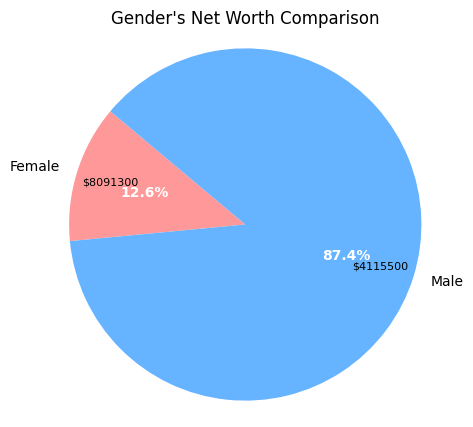

In [ ]:
gender_pd_df = gender_df.toPandas()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
colors = ['#ff9999', '#66b3ff']
wedges, texts, autotexts = plt.pie(gender_pd_df['total_net_worth'], labels=gender_pd_df['gender'],
                                   autopct='%1.1f%%', startangle=140, colors=colors)
plt.setp(autotexts, size=10, weight="bold", color="white")

for i, txt in enumerate(selfmade_pd_df['total_net_worth']):
    ang = (wedges[i].theta2 + wedges[i].theta1) / 2.0
    y = 0.8 * np.sin(np.deg2rad(ang))
    x = 0.8 * np.cos(np.deg2rad(ang))
    plt.text(x, y, f"${txt}", ha="center", va="center", fontsize=8)

plt.title("Gender's Net Worth Comparison")
plt.axis('equal')
plt.show()

### Which **status** is the most common for billionaires?

In [ ]:
# Value counts using Spark SQL
sql_status = ''' SELECT status, COUNT(*) AS status_counter FROM bill_table GROUP BY status ORDER BY COUNT(*) DESC '''
vc_status = spark.sql(sql_status)
vc_status.show()

+--------------------+--------------+
|              status|status_counter|
+--------------------+--------------+
|                   D|          1223|
|                   U|           855|
|                   E|           268|
|                   N|           150|
|Split Family Fortune|            79|
|                   R|            65|
+--------------------+--------------+



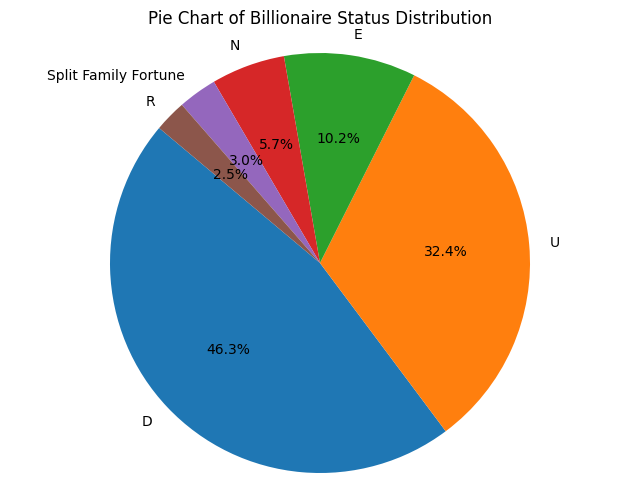

In [ ]:
# Filter the DataFrame for each status
status_counts = vc_status

# Extract labels and values for pie chart
status_labels = status_counts.select("status").rdd.flatMap(lambda x: x).collect()
status_values = status_counts.select("status_counter").rdd.flatMap(lambda x: x).collect()

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(status_values, labels=status_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Billionaire Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### What **city** would be the best for billionaires to grow?

In [ ]:
# Find Mode
sql_mode_city = ''' WITH grouped AS(
  SELECT city, COUNT(*) AS counter FROM bill_table GROUP BY city
)
SELECT MAX(counter)
FROM grouped  '''
mode_city = spark.sql(sql_mode_city)
mode_city.collect()[0][0]

99

In [ ]:
# Fill missing
bill_df = bill_df.fillna(mode_city.collect()[0][0], subset=['city'])

In [ ]:
# Get value counts
vc_city = bill_df.groupby('city').count().orderBy(col('count').desc())
vc_city = vc_city.filter(vc_city['count'] > 30)
vc_city.show(10)

+---------+-----+
|     city|count|
+---------+-----+
| New York|   99|
|     NULL|   72|
|  Beijing|   68|
|Hong Kong|   68|
| Shanghai|   64|
|   London|   61|
|   Moscow|   60|
|   Mumbai|   56|
| Shenzhen|   54|
|Singapore|   45|
+---------+-----+
only showing top 10 rows



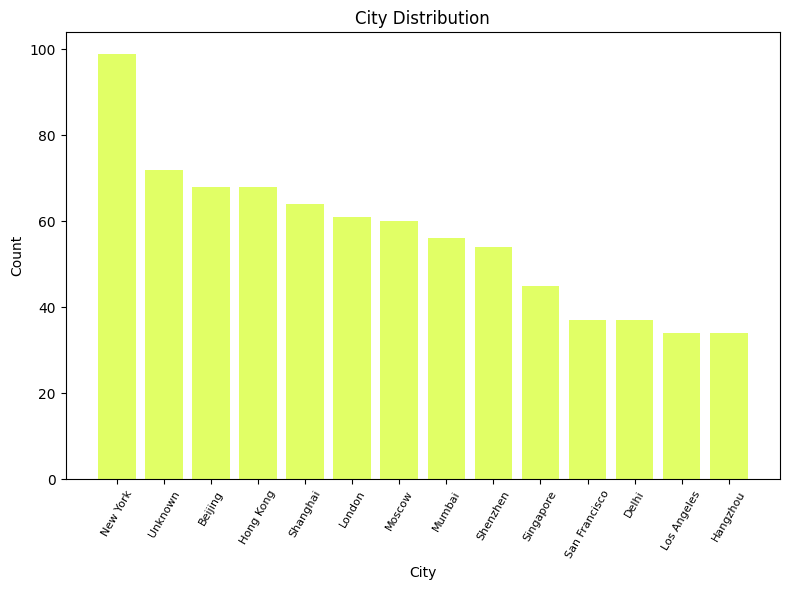

In [ ]:
# Collect data to plot
city_labels = vc_city.select("city").rdd.flatMap(lambda x: x).collect()
city_values = vc_city.select("count").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
city_labels = [label if label else 'Unknown' for label in city_labels]
city_values = [value if value else 0 for value in city_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(city_labels, city_values, color='#E1FF66')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

### What is the total **worth** for each category?

#### W1 - Top 5 richest man on Earth

In [ ]:
top_richest = bill_df.select("finalWorth", "personName")
filter5richest = bill_df.rank <= 5
top5_richest = top_richest.filter(filter5richest)
top5_richest.show()

+----------+--------------------+
|finalWorth|          personName|
+----------+--------------------+
|    211000|Bernard Arnault &...|
|    180000|           Elon Musk|
|    114000|          Jeff Bezos|
|    107000|       Larry Ellison|
|    106000|      Warren Buffett|
+----------+--------------------+



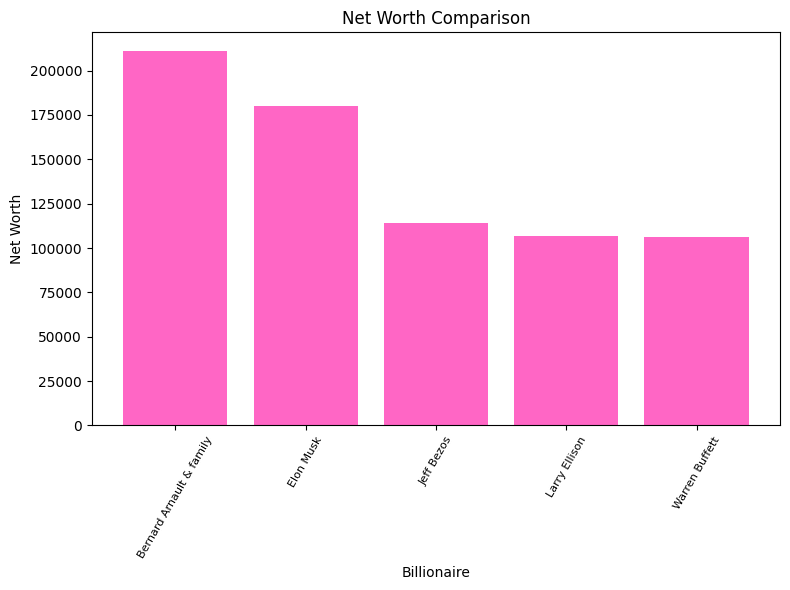

In [ ]:
# Collect data to plot
worth_labels = top5_richest.select("personName").rdd.flatMap(lambda x: x).collect()
worth_values = top5_richest.select("finalWorth").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
worth_labels = [label if label else 'Unknown' for label in worth_labels]
worth_values = [value if value else 0 for value in worth_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(worth_labels, worth_values, color='#FF66C5')
plt.xlabel('Billionaire')
plt.ylabel('Net Worth')
plt.title('Net Worth Comparison')
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

**Observations**:

The chart shows the net worth of the *top five billionaires in the world*. According to the bar chart, the top five billionaires are:

- *Bernard Arnault & family (210 billion USD)*
- *Elon Musk (175 billion USD)*
- *Jeff Bezos (115 billion USD)*
- *Larry Ellison (105 billion USD)*
- *Warren Buffett (105 billion USD)*

**The net worth of the billionaires is highly concentrated.** The top five billionaires on the chart have a combined net worth of $750 billion, which is more than the GDP of many countries. This suggests that the wealth of the world's billionaires is highly concentrated in the hands of a few people.

**The net worth of the billionaires is volatile.**

#### W2 - How many billionaires would it take, to have the same **worth** of the total remaining list of billionaires?

*Logic Flow for this task:*
1. Get the table of **personName** and **netWorth**
2. Calculate the sum of the **netWorth** of all billionaires for each specific rank
3. Calculate the sum of the **netWorth** of all other billionaires on the list for each specific rank
4. Find the rank with the lowest gaps of **netWorth**

In [ ]:
# Get the table of personName and netWorth
top_richest = bill_df.select("rank", "finalWorth", "personName")
top_richest.show(3)

+----+----------+--------------------+
|rank|finalWorth|          personName|
+----+----------+--------------------+
|   1|    211000|Bernard Arnault &...|
|   2|    180000|           Elon Musk|
|   3|    114000|          Jeff Bezos|
+----+----------+--------------------+
only showing top 3 rows



In [ ]:
top_richest.printSchema()

root
 |-- rank: integer (nullable = true)
 |-- finalWorth: integer (nullable = true)
 |-- personName: string (nullable = true)



In [ ]:
# Create SQL table for top richest
top_richest.createOrReplaceTempView('top_richest_table')

In [ ]:
# Calculate the sum of the netWorth of all billionaires for each specific rank
sql_sum_above = ''' SELECT *, SUM(finalWorth) OVER (ORDER BY rank ASC ROWS BETWEEN UNBOUNDED PRECEDING AND 0 PRECEDING) AS sum_above_net_worth
FROM top_richest_table; '''
top_richest_sa = spark.sql(sql_sum_above)
top_richest_sa.show()

+----+----------+--------------------+-------------------+
|rank|finalWorth|          personName|sum_above_net_worth|
+----+----------+--------------------+-------------------+
|   1|    211000|Bernard Arnault &...|             211000|
|   2|    180000|           Elon Musk|             391000|
|   3|    114000|          Jeff Bezos|             505000|
|   4|    107000|       Larry Ellison|             612000|
|   5|    106000|      Warren Buffett|             718000|
|   6|    104000|          Bill Gates|             822000|
|   7|     94500|   Michael Bloomberg|             916500|
|   8|     93000|Carlos Slim Helu ...|            1009500|
|   9|     83400|       Mukesh Ambani|            1092900|
|  10|     80700|       Steve Ballmer|            1173600|
|  11|     80500|Francoise Bettenc...|            1254100|
|  12|     79200|          Larry Page|            1333300|
|  13|     77300|      Amancio Ortega|            1410600|
|  14|     76000|         Sergey Brin|            148660

In [ ]:
# Calculate the sum of the netWorth of all other billionaires on the list for each specific rank
sql_sum_gap = '''
SELECT *, SUM(finalWorth) OVER (ORDER BY rank ASC ROWS BETWEEN UNBOUNDED PRECEDING AND 0 PRECEDING) AS sum_above_net_worth,
SUM(finalWorth) OVER (ORDER BY rank ASC ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS sum_below_net_worth,
ABS(SUM(finalWorth) OVER (ORDER BY rank ASC ROWS BETWEEN UNBOUNDED PRECEDING AND 0 PRECEDING) - SUM(finalWorth) OVER (ORDER BY rank ASC ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING)) AS gap
FROM top_richest_table
'''
top_richest_full = spark.sql(sql_sum_gap)
top_richest_full.createOrReplaceTempView('top_gap')
top_richest_full.show()

+----+----------+--------------------+-------------------+-------------------+--------+
|rank|finalWorth|          personName|sum_above_net_worth|sum_below_net_worth|     gap|
+----+----------+--------------------+-------------------+-------------------+--------+
|   1|    211000|Bernard Arnault &...|             211000|           12206800|11995800|
|   2|    180000|           Elon Musk|             391000|           11995800|11604800|
|   3|    114000|          Jeff Bezos|             505000|           11815800|11310800|
|   4|    107000|       Larry Ellison|             612000|           11701800|11089800|
|   5|    106000|      Warren Buffett|             718000|           11594800|10876800|
|   6|    104000|          Bill Gates|             822000|           11488800|10666800|
|   7|     94500|   Michael Bloomberg|             916500|           11384800|10468300|
|   8|     93000|Carlos Slim Helu ...|            1009500|           11290300|10280800|
|   9|     83400|       Mukesh A

In [ ]:
# Find the rank with the lowest gap of netWorth
sql_lowest_gap = ''' SELECT * FROM top_gap WHERE gap = (SELECT min(gap) FROM top_gap) '''
bill_gap = spark.sql(sql_lowest_gap)
bill_gap.show()

+----+----------+------------+-------------------+-------------------+----+
|rank|finalWorth|  personName|sum_above_net_worth|sum_below_net_worth| gap|
+----+----------+------------+-------------------+-------------------+----+
| 299|      7500|Henry Kravis|            6108300|            6106000|2300|
+----+----------+------------+-------------------+-------------------+----+



In [ ]:
top_richest.count()

2640

In conclusion, the **300 richest billionaires** have the new worth equal to the remaining 2340 billionaires.

In [ ]:
# Visualization
# Create data
gap_comparison = [(6108300, 6106000)]

# Define schema
schema77 = ["Top_300_billionaires_worth", "Remaining_2340_billionaires"]

# Create DataFrame
gap_df = spark.createDataFrame(gap_comparison, schema=schema77)
gap_df.show()

+--------------------------+---------------------------+
|Top_300_billionaires_worth|Remaining_2340_billionaires|
+--------------------------+---------------------------+
|                   6108300|                    6106000|
+--------------------------+---------------------------+



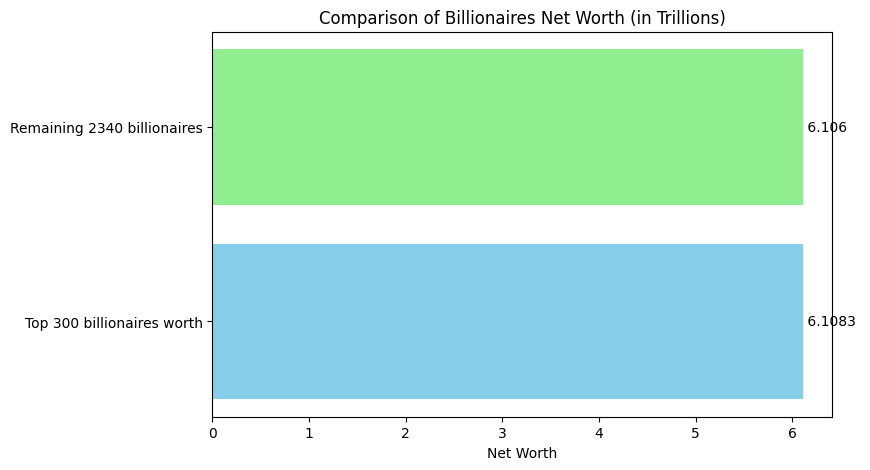

In [ ]:
# Visualization of the comparison
# Data for the horizontal bar chart
categories = ['Top 300 billionaires worth', 'Remaining 2340 billionaires']
values = [6.1083, 6.106]

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(categories, values, color=['skyblue', 'lightgreen'])

# Add data labels
for i, value in enumerate(values):
    plt.text(value, i, f' {value} ', va='center')

# Set labels and title
plt.xlabel('Net Worth')
plt.title('Comparison of Billionaires Net Worth (in Trillions)')

plt.show()

#### W3 - which **industries** are the most valuable?

In [ ]:
sql_worth_industry = '''SELECT industries, sum(finalWorth) AS totalWorth FROM bill_table GROUP BY industries ORDER BY sum(finalWorth) DESC'''
inworth = spark.sql(sql_worth_industry)
inworth.show(10)

+--------------------+----------+
|          industries|totalWorth|
+--------------------+----------+
|          Technology|   1877900|
|    Fashion & Retail|   1698800|
|Finance & Investm...|   1605100|
|       Manufacturing|   1019000|
|     Food & Beverage|    957200|
|         Diversified|    905200|
|         Real Estate|    657400|
|          Healthcare|    643200|
|          Automotive|    525300|
|              Energy|    453500|
+--------------------+----------+
only showing top 10 rows



The most valueable industry is **Business** with the total Net Worth of 1.877 Trillion USD.

Followed by **Fashion & Retail** and **Finance & Investment**

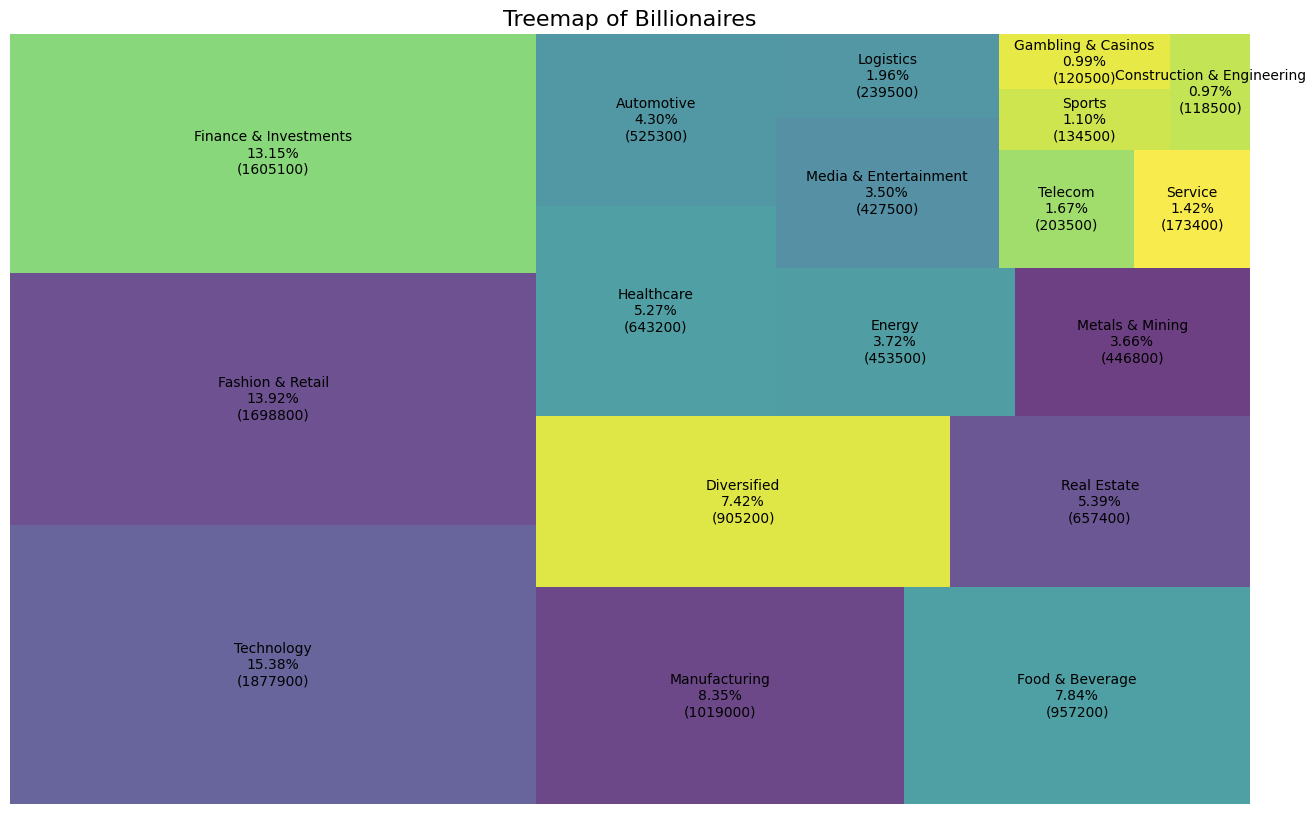

In [ ]:
# Collect data for Treemap
sizes_list = inworth.select('totalWorth').rdd.flatMap(lambda x: x).collect()
labels_list = inworth.select('industries').rdd.flatMap(lambda x: x).collect()

# Calculate proportions and create labels with proportions and values
total = sum(sizes_list)
proportions = [(size / total) * 100 for size in sizes_list]
labels = [f'{label}\n{prop:.2f}%\n({size})' for label, prop, size in zip(labels_list, proportions, sizes_list)]

# Create treemap
plt.figure(figsize=(16, 10))  # Adjust figure size if needed
squarify.plot(sizes=sizes_list, label=labels, alpha=0.8)

# Add labels
plt.axis('off')  # Turn off axis labels
plt.title('Treemap of Billionaires', fontsize=16)  # Change font size of title

plt.show()

**Based on the treemap image of billionaire contributions to industry, here are some assumptions:**

1. **The treemap shows the contributions of billionaires to various industries, in billions of US dollars**. The image shows that the top five industries to which billionaires have contributed are **technology, fashion & retail, finance & investments, diversified,** and **manufacturing**.
2. **The contributions of billionaires to each industry are measured in terms of the value of their investments, donations, and other forms of support**.

#### W4 - which **country** are the most valuable?

In [ ]:
# Create the dataframe with every country with total net Worth
sql_worth_country = ''' SELECT country, SUM(finalWorth) AS sum_worth FROM bill_table GROUP BY country '''
country_worth = spark.sql(sql_worth_country)
country_worth_other = country_worth

# Filtering
filter_rank11up = country_worth_other.sum_worth > 300000
filter_rank11down = country_worth_other.sum_worth < 300000
country_worth = country_worth.filter(filter_rank11up).orderBy(col('sum_worth').desc())

# Calculate total of "Other" countries
country_worth_other = country_worth_other.filter(filter_rank11down)
country_worth_other.createOrReplaceTempView('OtherTable')
sql_cal = ''' SELECT SUM(sum_worth) FROM OtherTable '''
other_table = spark.sql(sql_cal)
pandas_df = pd.DataFrame({"country": ['OTHERS'], "sum_worth": [2782800]})
other_df = spark.createDataFrame(pandas_df)

# Join the 2 tables
full_country_worth = country_worth.union(other_df)
full_country_worth.show()

+--------------+---------+
|       country|sum_worth|
+--------------+---------+
| United States|  4575100|
|         China|  1805500|
|         India|   628700|
|        France|   499500|
|       Germany|   462100|
|   Switzerland|   409900|
|United Kingdom|   370700|
|        Russia|   351000|
|     Hong Kong|   321500|
|        OTHERS|  2782800|
+--------------+---------+



The country **United States** contains the highest amount of worth with the total Net Worth of 4.575 Trillion USD.

Followed by **China** with 1.805 Trillion USD and **India** with 628 Billion USD

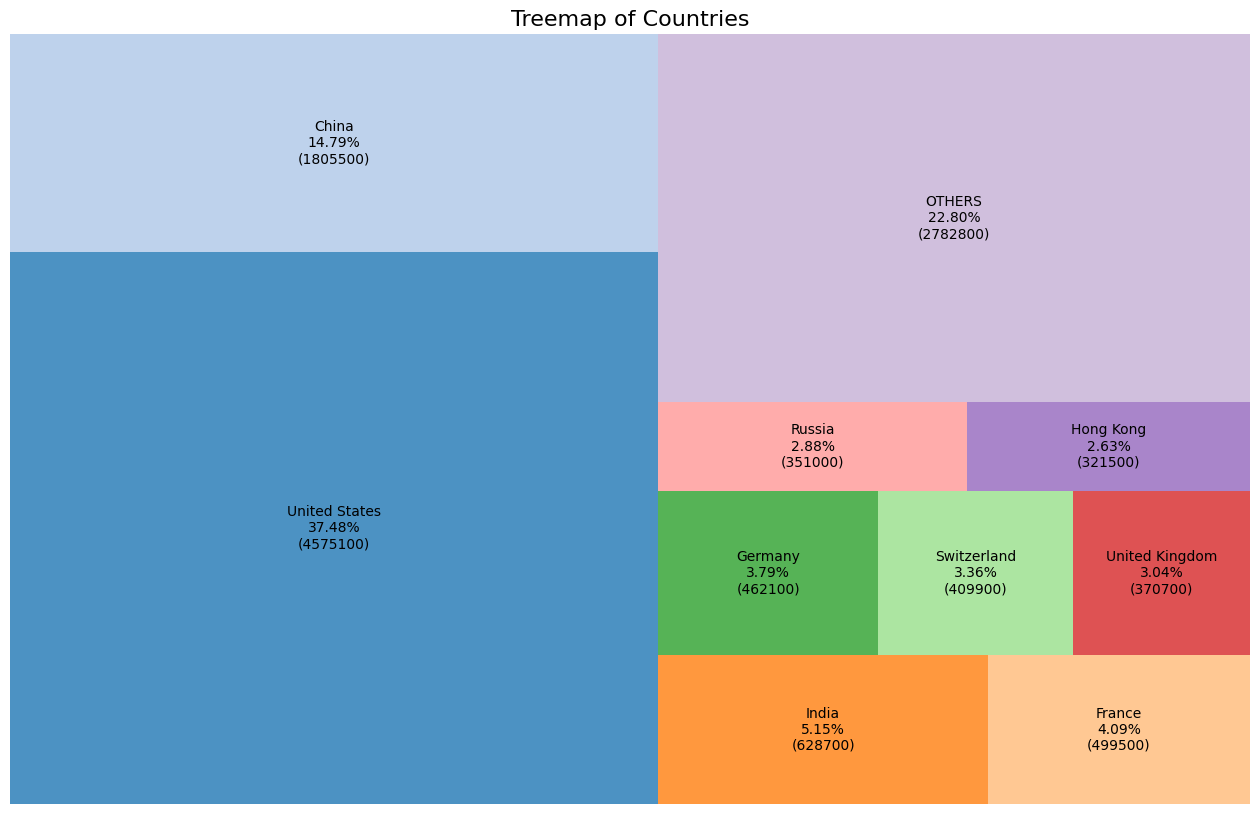

In [ ]:
# Visualization using TreeMap
import matplotlib.cm as cm

# Choose a color map
color_map = cm.tab20

# Collect data for Treemap
sizes_list = full_country_worth.select('sum_Worth').rdd.flatMap(lambda x: x).collect()
labels_list = full_country_worth.select('country').rdd.flatMap(lambda x: x).collect()

# Calculate proportions and create labels with proportions and values
total = sum(sizes_list)
proportions = [(size / total) * 100 for size in sizes_list]
labels = [f'{label}\n{prop:.2f}%\n({size})' for label, prop, size in zip(labels_list, proportions, sizes_list)]

# Create treemap
plt.figure(figsize=(16, 10))  # Adjust figure size if needed
squarify.plot(sizes=sizes_list, label=labels, alpha=0.8, color=color_map.colors)

# Add labels
plt.axis('off')  # Turn off axis labels
plt.title('Treemap of Countries', fontsize=16)  # Change font size of title

plt.show()

**Observations**:
1. The United States has the highest net worth of billionaire with 4 Trillion USD, which accounted for 37.48% of the total worth of every billionaires in the world.
2. Followed by **China** (15%), **India** (5%) and **France** (4%)


#### W5 - which **city** are the most valuable?

In [ ]:
# Create the dataframe with every city
sql_worth_city = ''' SELECT city, SUM(finalWorth) AS sum_worth FROM bill_table GROUP BY city '''
city_worth = spark.sql(sql_worth_city).orderBy(col('sum_worth').desc())
city_worth_other = city_worth

# Split Cities and "OTHERs"
filter_city_up = city_worth.sum_worth > 120000
filter_city_down = city_worth_other.sum_worth < 120000

city_worth = city_worth.filter(filter_city_up)
city_worth_other = city_worth_other.filter(filter_city_down)
city_worth.show()
city_worth_other.show(3)

+-----------+---------+
|       city|sum_worth|
+-----------+---------+
|   New York|   611000|
|      Paris|   408600|
|     Moscow|   298300|
|     London|   292500|
|  Hong Kong|   286800|
|     Mumbai|   276400|
|     Austin|   271000|
|    Beijing|   247200|
|   Shenzhen|   246000|
|       NULL|   232900|
|     Medina|   229700|
|   Hangzhou|   213200|
|  Palo Alto|   197200|
|   Shanghai|   179700|
|Mexico City|   154300|
|  Singapore|   135500|
+-----------+---------+

+-----------+---------+
|       city|sum_worth|
+-----------+---------+
|      Delhi|   116400|
|Bentonville|   116400|
|Los Angeles|   115500|
+-----------+---------+
only showing top 3 rows



In [ ]:
# Calculate "Other" cities' worth
city_worth_other.createOrReplaceTempView('other_city')
sql_otherct = ''' SELECT SUM(sum_worth) AS sum_x FROM other_city '''
other_city = spark.sql(sql_otherct)
other_city_sum_value = other_city.first()[0]
print(other_city_sum_value)

# Create Spark out of the 'Other'
pandas_df2 = pd.DataFrame({"city": ['OTHERS'], "sum_worth": [other_city_sum_value]})
other_city_df = spark.createDataFrame(pandas_df2)

7926500


In [ ]:
# Merge 2 spark DFs as final step
full_city_worth = city_worth.union(other_city_df)
full_city_worth.show()

+-----------+---------+
|       city|sum_worth|
+-----------+---------+
|   New York|   611000|
|      Paris|   408600|
|     Moscow|   298300|
|     London|   292500|
|  Hong Kong|   286800|
|     Mumbai|   276400|
|     Austin|   271000|
|    Beijing|   247200|
|   Shenzhen|   246000|
|       NULL|   232900|
|     Medina|   229700|
|   Hangzhou|   213200|
|  Palo Alto|   197200|
|   Shanghai|   179700|
|Mexico City|   154300|
|  Singapore|   135500|
|     OTHERS|  7926500|
+-----------+---------+



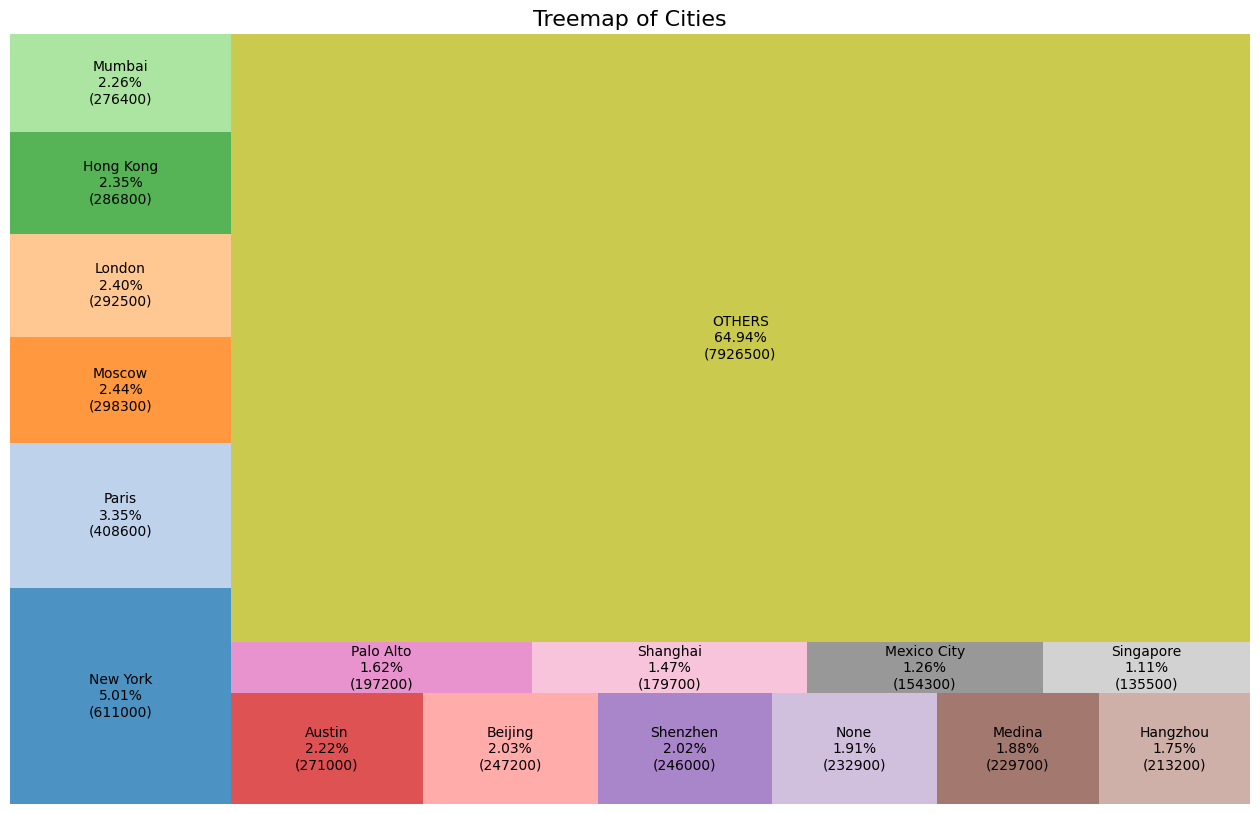

In [ ]:
# Visualization using Treemap

# Collect data for Treemap
sizes_list = full_city_worth.select('sum_worth').rdd.flatMap(lambda x: x).collect()
labels_list = full_city_worth.select('city').rdd.flatMap(lambda x: x).collect()

# Calculate proportions and create labels with proportions and values
total = sum(sizes_list)
proportions = [(size / total) * 100 for size in sizes_list]
labels = [f'{label}\n{prop:.2f}%\n({size})' for label, prop, size in zip(labels_list, proportions, sizes_list)]

# Create treemap
plt.figure(figsize=(16, 10))  # Adjust figure size if needed
squarify.plot(sizes=sizes_list, label=labels, alpha=0.8, color=color_map.colors)

# Add labels
plt.axis('off')  # Turn off axis labels
plt.title('Treemap of Cities', fontsize=16)  # Change font size of title

plt.show()

#### W6 - Top 10 most valuable **source of wealth**

In [ ]:
sql_source = ''' SELECT source, SUM(finalWorth) AS sum_worth FROM bill_table WHERE finalWorth IS NOT NULL GROUP BY source '''
source_df = spark.sql(sql_source).orderBy(col('sum_worth').desc()).limit(10)
source_df.show()

+---------------+---------+
|         source|sum_worth|
+---------------+---------+
|    Real estate|   539000|
|    Diversified|   395100|
|    Investments|   345000|
|    Hedge funds|   271300|
|Pharmaceuticals|   254300|
|        Walmart|   220900|
|           LVMH|   211000|
|      Microsoft|   196400|
|         Google|   189000|
|  Tesla, SpaceX|   180000|
+---------------+---------+



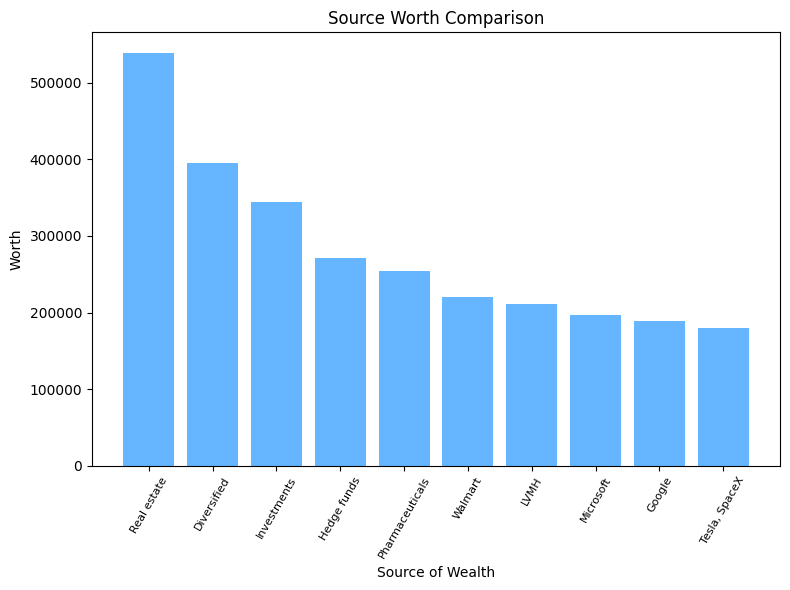

In [ ]:
# Collect data to plot
source_labels = source_df.select("source").rdd.flatMap(lambda x: x).collect()
source_values = source_df.select("sum_worth").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
source_labels = [label if label else 'Unknown' for label in source_labels]
source_values = [value if value else 0 for value in source_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(source_labels, source_values, color='#66B5FF')
plt.xlabel('Source of Wealth')
plt.ylabel('Worth')
plt.title('Source Worth Comparison')
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

#### W7 - Top 15 most valuable **organization**

In [ ]:
sql_organ = ''' SELECT organization, SUM(finalWorth) AS sum_worth FROM bill_table WHERE finalWorth IS NOT NULL AND organization IS NOT NULL GROUP BY organization '''
organ_df = spark.sql(sql_organ).orderBy(col('sum_worth').desc()).limit(15)
organ_df.show()

+--------------------+---------+
|        organization|sum_worth|
+--------------------+---------+
|LVMH Moët Henness...|   211000|
|               Tesla|   180000|
|            Alphabet|   155200|
|              Amazon|   114000|
|Bill & Melinda Ga...|   110500|
|              Oracle|   108500|
|Berkshire Hathawa...|   108200|
|           Bloomberg|    94500|
|       América Móvil|    93000|
| Reliance Industries|    83400|
|Los Angeles Clippers|    80700|
|      Meta Platforms|    78800|
|Koch Industries, ...|    59000|
|Arvest Bank Group...|    58800|
|             Walmart|    57600|
+--------------------+---------+



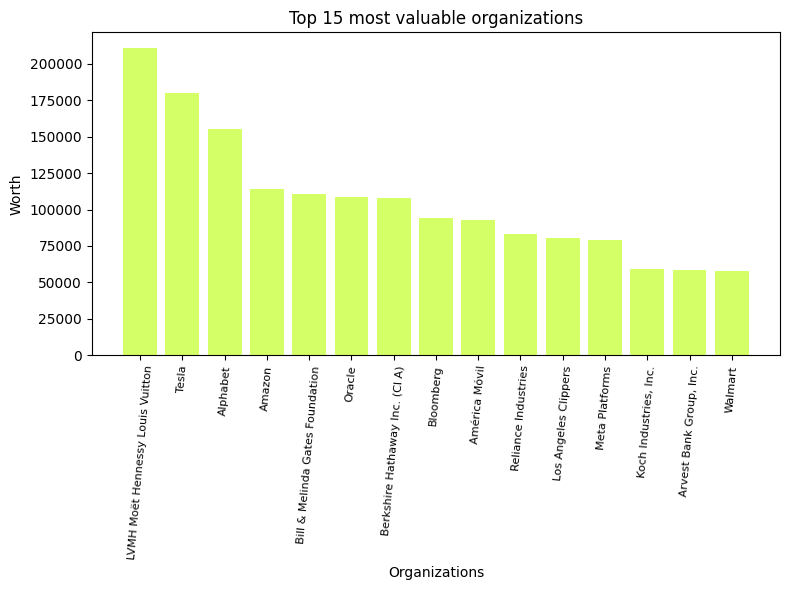

In [ ]:
# Collect data to plot
organ_labels = organ_df.select("organization").rdd.flatMap(lambda x: x).collect()
organ_values = organ_df.select("sum_worth").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
organ_labels = [label if label else 'Unknown' for label in organ_labels]
organ_values = [value if value else 0 for value in organ_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(organ_labels, organ_values, color='#D5FF66')
plt.xlabel('Organizations')
plt.ylabel('Worth')
plt.title('Top 15 most valuable organizations')
plt.xticks(rotation=85, fontsize=8)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

### What **Day** and **Month** of Birth Date is more likely to be a billionaire?

In [ ]:
# Change data type of BirthDate to Date-typed
to_date_df = bill_df.withColumn('birthdate_date', to_date(bill_df['birthDate'], 'M/d/yyyy H:mm'))

# Get table with Day and Month
only_date_df = to_date_df.select("birthdate_date", "finalWorth")
only_date_df = only_date_df.withColumn('Month_Born', month(col('birthdate_date')))
only_date_df = only_date_df.withColumn('Day_Born', dayofmonth(col('birthdate_date')))

# Create temp sql, filter NULLs
only_date_df.createOrReplaceTempView('only_date')
sql_dm_filter = ''' SELECT birthdate_date, (finalWorth / 1000) AS finalWorth, Month_Born, Day_Born FROM only_date WHERE Month_Born IS NOT NULL AND Day_Born IS NOT NULL '''
only_date_df = spark.sql(sql_dm_filter)

only_date_df.show(5)

+--------------+----------+----------+--------+
|birthdate_date|finalWorth|Month_Born|Day_Born|
+--------------+----------+----------+--------+
|    1949-03-05|     211.0|         3|       5|
|    1971-06-28|     180.0|         6|      28|
|    1964-01-12|     114.0|         1|      12|
|    1944-08-17|     107.0|         8|      17|
|    1930-08-30|     106.0|         8|      30|
+--------------+----------+----------+--------+
only showing top 5 rows



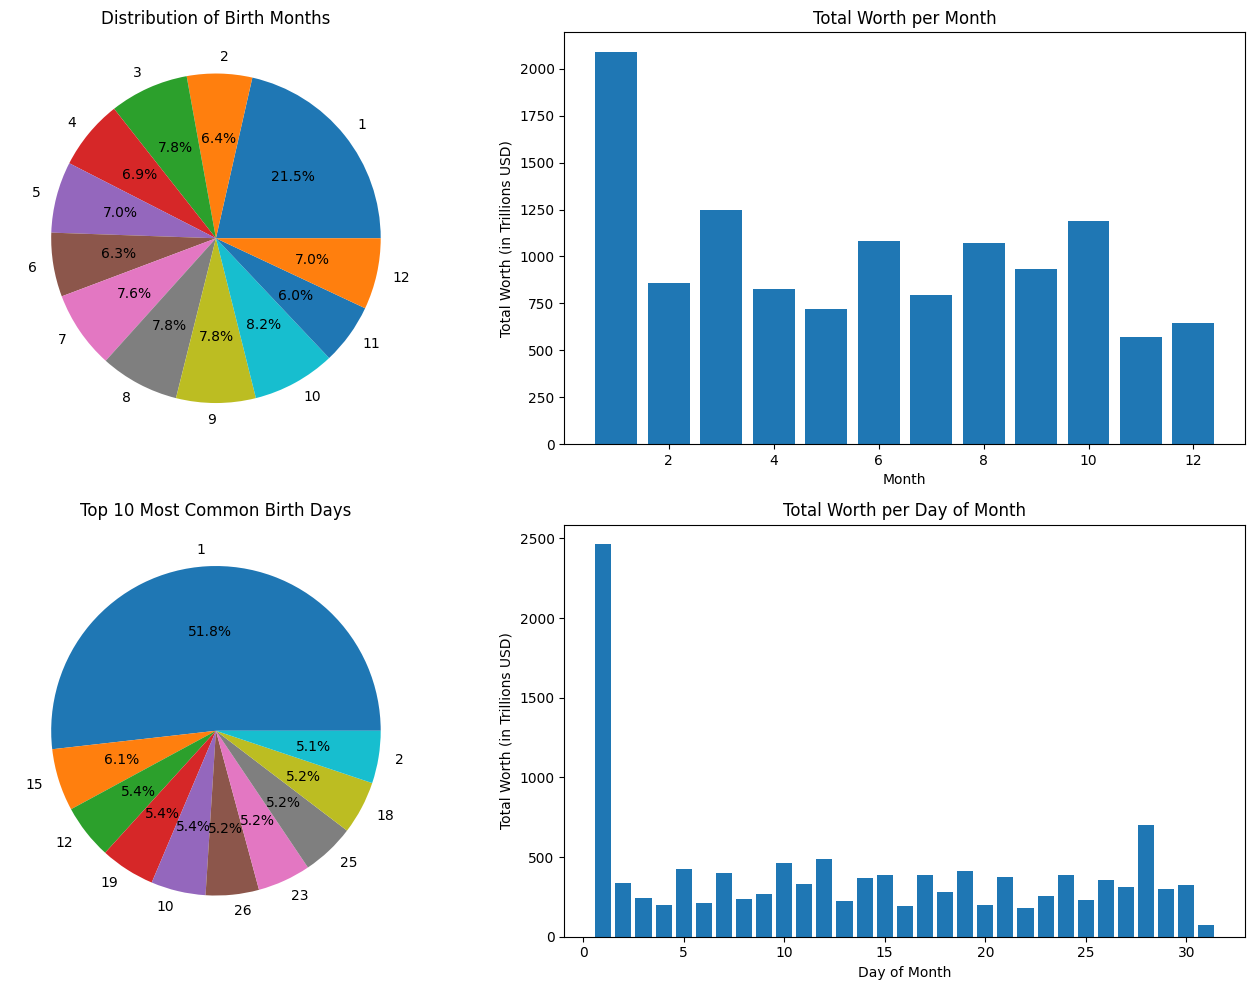

In [ ]:
# Create nested 2x2 charts for the best visualization
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Chart 1: Pie chart to count the value for each month
month_counts = only_date_df.groupBy('Month_Born').count().orderBy('Month_Born').toPandas()
axs[0, 0].pie(month_counts['count'], labels=month_counts['Month_Born'], autopct='%1.1f%%')
axs[0, 0].set_title('Distribution of Birth Months')

# Chart 2: Bar chart to sum the finalWorth of each month
month_worth = only_date_df.groupBy('Month_Born').agg(F.sum('finalWorth').alias('Total_Worth')).orderBy('Month_Born').toPandas()
axs[0, 1].bar(month_worth['Month_Born'], month_worth['Total_Worth'])
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Worth (in Trillions USD)')
axs[0, 1].set_title('Total Worth per Month')

# Chart 3: Pie chart to count the value of each day of month (top 10 most appeared day)
top_days = only_date_df.groupBy('Day_Born').count().orderBy(F.desc('count')).limit(10).toPandas()
axs[1, 0].pie(top_days['count'], labels=top_days['Day_Born'], autopct='%1.1f%%')
axs[1, 0].set_title('Top 10 Most Common Birth Days')

# Chart 4: Bar chart to sum the finalWorth of each day of month (ordered by ascending day)
day_worth = only_date_df.groupBy('Day_Born').agg(F.sum('finalWorth').alias('Total_Worth')).orderBy('Day_Born').toPandas()
axs[1, 1].bar(day_worth['Day_Born'], day_worth['Total_Worth'])
axs[1, 1].set_xlabel('Day of Month')
axs[1, 1].set_ylabel('Total Worth (in Trillions USD)')
axs[1, 1].set_title('Total Worth per Day of Month')

plt.tight_layout()
plt.show()

### What is the most famous job **title** of billionaires?

#### T1 - What **Job Title** is the most common for billionaires?

In [ ]:
sql_title_count = ''' SELECT title, COUNT(*) AS title_count FROM bill_table WHERE title IS NOT NULL GROUP BY title'''
title_count = spark.sql(sql_title_count).orderBy(col('title_count').desc()).limit(10)
title_count.show(6)

+----------------+-----------+
|           title|title_count|
+----------------+-----------+
|        Investor|         44|
|         Founder|         34|
|             CEO|         29|
|Chairman and CEO|         28|
|        Chairman|         25|
|       Cofounder|         24|
+----------------+-----------+
only showing top 6 rows



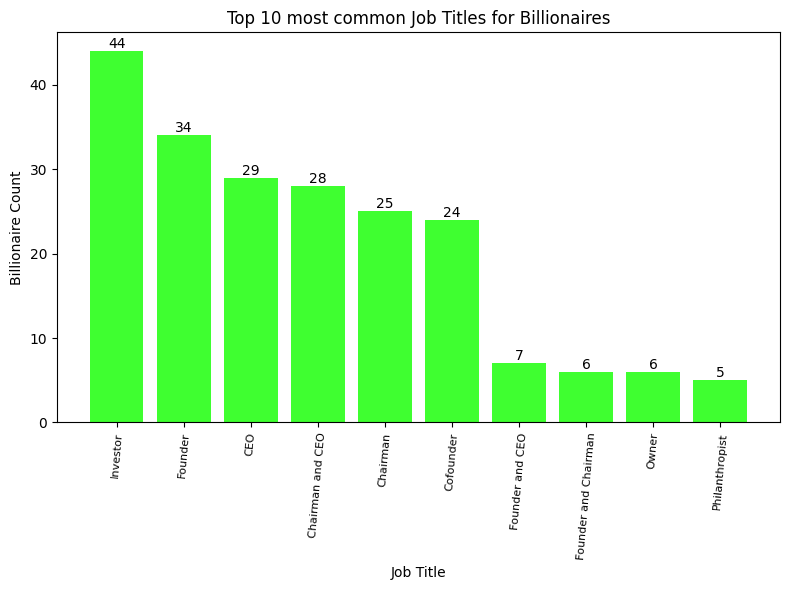

In [ ]:
# Collect data to plot
title_labels = title_count.select("title").rdd.flatMap(lambda x: x).collect()
title_values = title_count.select("title_count").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
title_labels = [label if label else 'Unknown' for label in title_labels]
title_values = [value if value else 0 for value in title_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(title_labels, title_values, color='#3FFF30')
plt.xlabel('Job Title')
plt.ylabel('Billionaire Count')
plt.title('Top 10 most common Job Titles for Billionaires')

for bar, value in zip(bars, title_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=85, fontsize=8)
plt.tight_layout()
plt.show()

#### T2 - What **Job Title** worths the most?

In [ ]:
sql_title_worth = ''' SELECT title, SUM(finalWorth) / 1000 AS title_worth_tril FROM bill_table WHERE title IS NOT NULL GROUP BY title'''
title_worth = spark.sql(sql_title_worth).orderBy(col('title_worth_tril').desc()).limit(10)
title_worth.show(6)

+--------------------+----------------+
|               title|title_worth_tril|
+--------------------+----------------+
|    Chairman and CEO|           590.4|
|                 CEO|           524.6|
|             Founder|           247.6|
|            Chairman|           235.4|
|            Investor|           188.5|
|Cofounder and boa...|           155.2|
+--------------------+----------------+
only showing top 6 rows



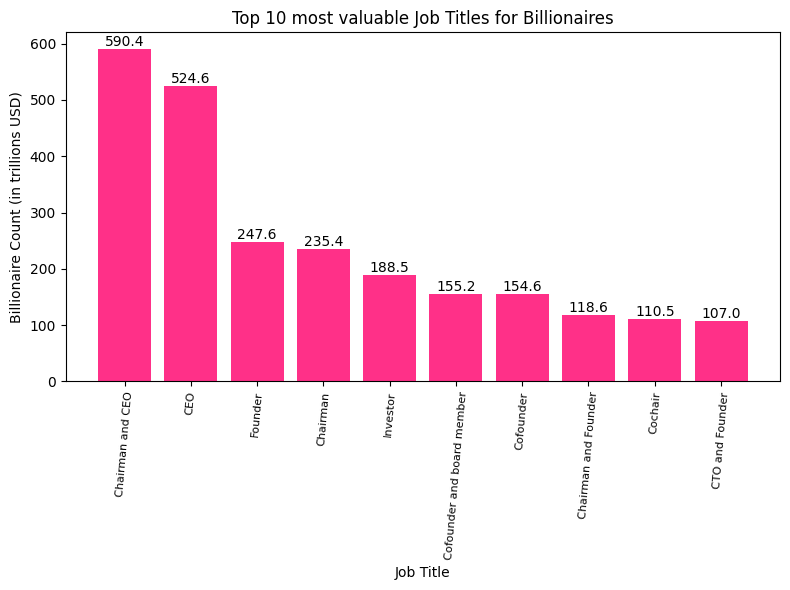

In [ ]:
# Collect data to plot
title_labels = title_worth.select("title").rdd.flatMap(lambda x: x).collect()
title_values = title_worth.select("title_worth_tril").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
title_labels = [label if label else 'Unknown' for label in title_labels]
title_values = [value if value else 0 for value in title_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(title_labels, title_values, color='#FF3088')
plt.xlabel('Job Title')
plt.ylabel('Billionaire Count (in trillions USD)')
plt.title('Top 10 most valuable Job Titles for Billionaires')

for bar, value in zip(bars, title_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=85, fontsize=8)
plt.tight_layout()
plt.show()

#### T3 - What billionaire's **Job Title** is the most common for each **gender**?

In [ ]:
# Both gender counts
sql_title_gender_count = ''' SELECT title, gender, COUNT(*) AS g_counter, SUM(finalWorth) / 1000 AS g_worth_tril FROM bill_table WHERE title IS NOT NULL GROUP BY title, gender'''
title_gender_count = spark.sql(sql_title_gender_count).orderBy(col('g_counter').desc())
title_gender_count.show(6)

+----------------+------+---------+------------+
|           title|gender|g_counter|g_worth_tril|
+----------------+------+---------+------------+
|        Investor|     M|       44|       188.5|
|         Founder|     M|       33|       246.5|
|Chairman and CEO|     M|       27|       579.5|
|        Chairman|     M|       25|       235.4|
|             CEO|     M|       24|       494.5|
|       Cofounder|     M|       21|       135.4|
+----------------+------+---------+------------+
only showing top 6 rows



As we can see on the table, **Male**'s number heavily dominated the **Female**'s number. So I will split the chart for each gender

In [ ]:
# Male count
male_filter = title_gender_count.gender == 'M'
title_male = title_gender_count.filter(male_filter).limit(15)
title_male.show(6)

+----------------+------+---------+------------+
|           title|gender|g_counter|g_worth_tril|
+----------------+------+---------+------------+
|        Investor|     M|       44|       188.5|
|         Founder|     M|       33|       246.5|
|Chairman and CEO|     M|       27|       579.5|
|        Chairman|     M|       25|       235.4|
|             CEO|     M|       24|       494.5|
|       Cofounder|     M|       21|       135.4|
+----------------+------+---------+------------+
only showing top 6 rows



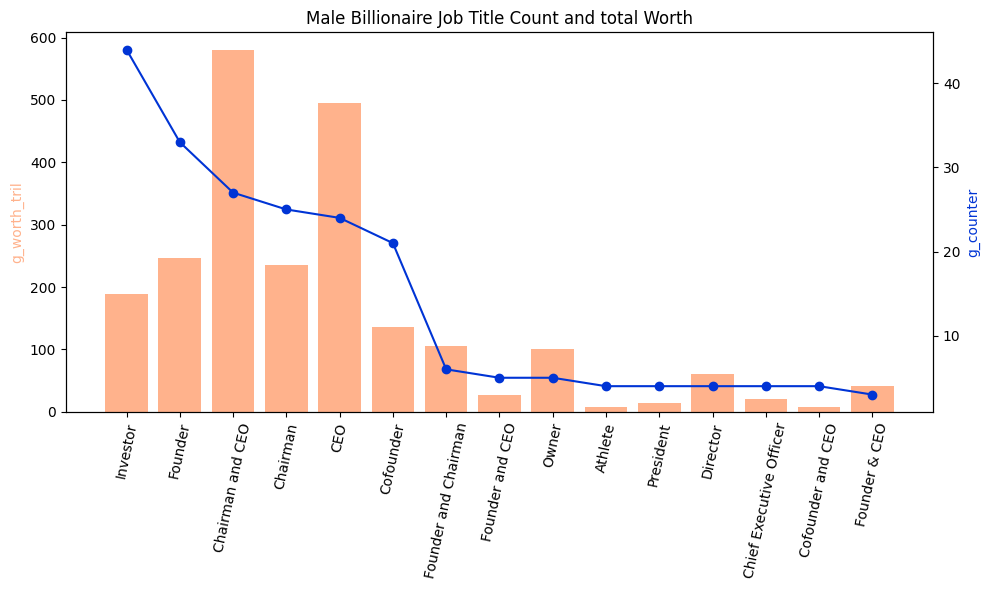

In [ ]:
# Data for bar chart (right side y-axis)
titles = title_male.select('title').rdd.flatMap(lambda x: x).collect()
g_worth_tril = title_male.select('g_worth_tril').rdd.flatMap(lambda x: x).collect()

# Data for line chart (left side y-axis)
g_counter = title_male.select('g_counter').rdd.flatMap(lambda x: x).collect()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar chart on the right y-axis
ax1.bar(titles, g_worth_tril, color='#FFB28C')
ax1.set_ylabel('g_worth_tril', color='#FFB28C')

# Create line chart on the left y-axis
ax2 = ax1.twinx()
ax2.plot(titles, g_counter, marker='o', color='#0034D5')
ax2.set_ylabel('g_counter', color='#0034D5')

# Title and labels
plt.title('Male Billionaire Job Title Count and total Worth')
plt.xlabel('Title')

# Rotate x-axis labels
for tick in ax1.get_xticklabels():
    tick.set_rotation(78)

plt.tight_layout()
plt.show()

While **Investor** is the most common Job Title for a male billionaire, **Chairman and CEO** seems to be the most valuable with the total net worth of more than *40 Trillion US Dollars*

In [ ]:
# Female count
female_filter = title_gender_count.gender == 'F'
title_female = title_gender_count.filter(female_filter)
title_female.show(6)

+--------------------+------+---------+------------+
|               title|gender|g_counter|g_worth_tril|
+--------------------+------+---------+------------+
|                 CEO|     F|        5|        30.1|
|      Philanthropist|     F|        5|        95.5|
|           Cofounder|     F|        3|        19.2|
|     Founder and CEO|     F|        2|        13.2|
|Investor, Philant...|     F|        2|        16.2|
|             Founder|     F|        1|         1.1|
+--------------------+------+---------+------------+
only showing top 6 rows



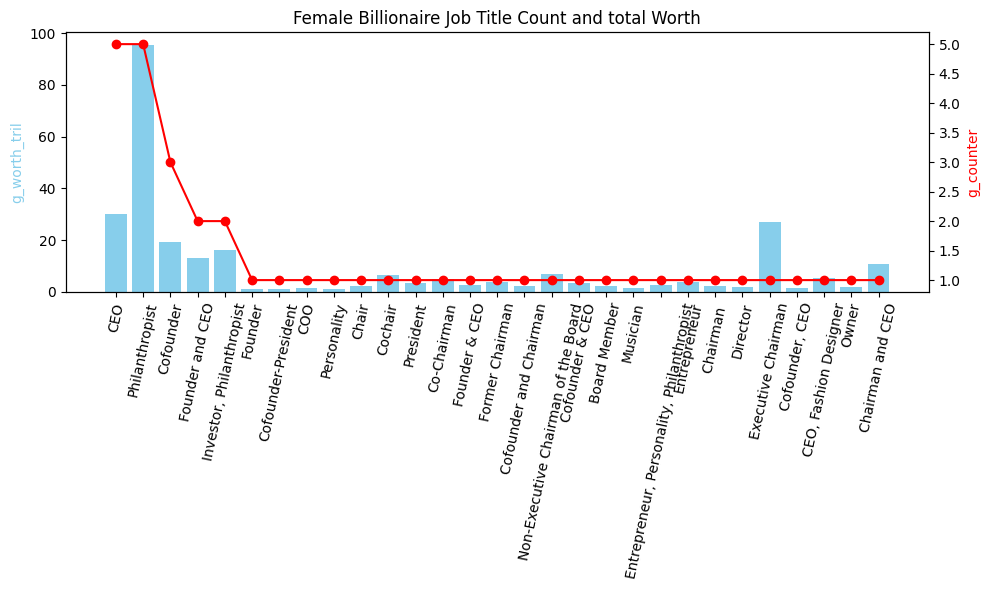

In [ ]:
# Data for bar chart (right side y-axis)
titles = title_female.select('title').rdd.flatMap(lambda x: x).collect()
g_worth_tril = title_female.select('g_worth_tril').rdd.flatMap(lambda x: x).collect()

# Data for line chart (left side y-axis)
g_counter = title_female.select('g_counter').rdd.flatMap(lambda x: x).collect()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar chart on the right y-axis
ax1.bar(titles, g_worth_tril, color='skyblue')
ax1.set_ylabel('g_worth_tril', color='skyblue')

# Create line chart on the left y-axis
ax2 = ax1.twinx()
ax2.plot(titles, g_counter, marker='o', color='red')
ax2.set_ylabel('g_counter', color='red')

# Title and labels
plt.title('Female Billionaire Job Title Count and total Worth')
plt.xlabel('Title')

# Rotate x-axis labels
for tick in ax1.get_xticklabels():
    tick.set_rotation(78)

plt.tight_layout()
plt.show()

**CEO** is not only a common for a male billionaire, but also the most common Job Title for Female Billionaire.

Suprisingly, **Philanthropist** title worths the most for Female Billionaire

### In the **United States**, which **state** has the most billionaires?

In [186]:
# Get the data table of statistic in all states of the US
filter_us = bill_df.country == 'United States'
us_state_df = bill_df.filter(filter_us).select('country', 'state', 'finalWorth', 'age' , 'industries', 'gender', 'status', 'selfMade')
us_state_df.createOrReplaceTempView('us_state')
sql_us_state_grouped = '''
WITH industry_mode AS(
  SELECT state, industries, COUNT(*) AS counter
  FROM us_state
  GROUP BY state, industries
), industry_mode2 AS(
  SELECT *, RANK() OVER (PARTITION BY state, industries ORDER BY counter DESC) AS Ranking
  FROM industry_mode
), industry_mode3 AS(
  SELECT * FROM industry_mode2
  WHERE Ranking = 1
)
SELECT U.country, U.state, COUNT(DISTINCT U.*) AS bill_counter, ROUND(SUM(U.finalWorth) / 1000000, 2) AS total_worth_tril, ROUND(AVG(U.age), 2) AS avg_age, COUNT(DISTINCT U.*) AS self_made_counter
FROM us_state U
JOIN industry_mode3 temp
ON temp.state = U.state
GROUP BY U.country, U.state
'''
us_state_grouped = spark.sql(sql_us_state_grouped).orderBy(col('bill_counter').desc())
us_state_grouped.show(5)

+-------------+----------+------------+----------------+-------+-----------------+
|      country|     state|bill_counter|total_worth_tril|avg_age|self_made_counter|
+-------------+----------+------------+----------------+-------+-----------------+
|United States|California|         178|           11.48|  62.16|              178|
|United States|  New York|         126|            9.51|  66.86|              126|
|United States|   Florida|          94|            6.12|  68.63|               94|
|United States|     Texas|          70|            8.07|   70.4|               70|
|United States|  Illinois|          24|            0.82|  67.29|               24|
+-------------+----------+------------+----------------+-------+-----------------+
only showing top 5 rows



In [164]:
# Count the number of states
us_state_grouped.count()

45

There are **45 states** in the USA in which there are at least one billionaire.

In [165]:
# Create temp table for SQL processing
us_state_df.createOrReplaceTempView('us_state')

In [166]:
# Check data type
us_state_grouped.printSchema()

root
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- bill_counter: long (nullable = false)
 |-- total_worth: long (nullable = true)
 |-- avg_age: double (nullable = true)
 |-- self_made_counter: long (nullable = false)



#### U1 - Which **state** has the most billionaires?

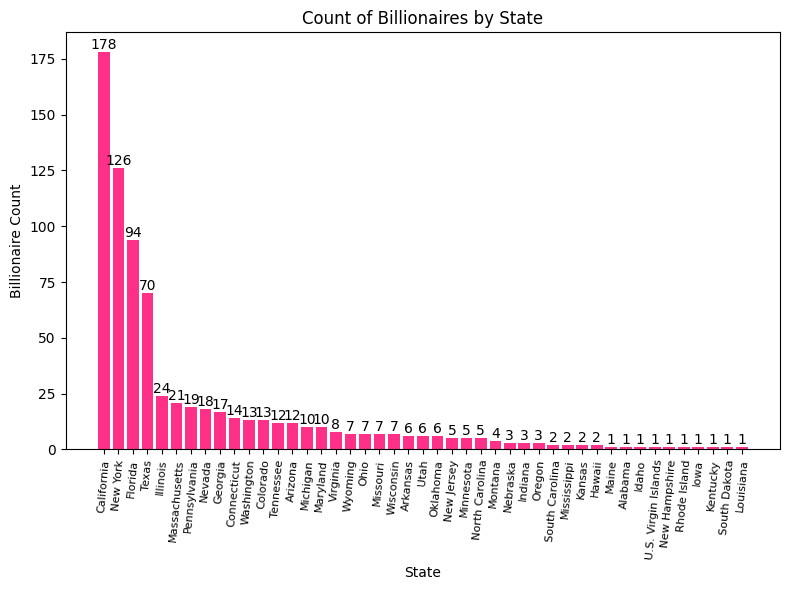

In [167]:
# Collect data to plot
state_labels = us_state_grouped.select("state").rdd.flatMap(lambda x: x).collect()
state_values = us_state_grouped.select("bill_counter").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
state_labels = [label if label else 'Unknown' for label in state_labels]
state_values = [value if value else 0 for value in state_values]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(state_labels, state_values, color='#FF3088')
plt.xlabel('State')
plt.ylabel('Billionaire Count')
plt.title('Count of Billionaires by State')

for bar, value in zip(bars, state_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=85, fontsize=8)
plt.tight_layout()
plt.show()

**California** has the highest number of billionaires with 178 people.

**New York** has the second highest number of billionaires with 126.

#### U2 - Which **state** has the highest worth of billionaire?

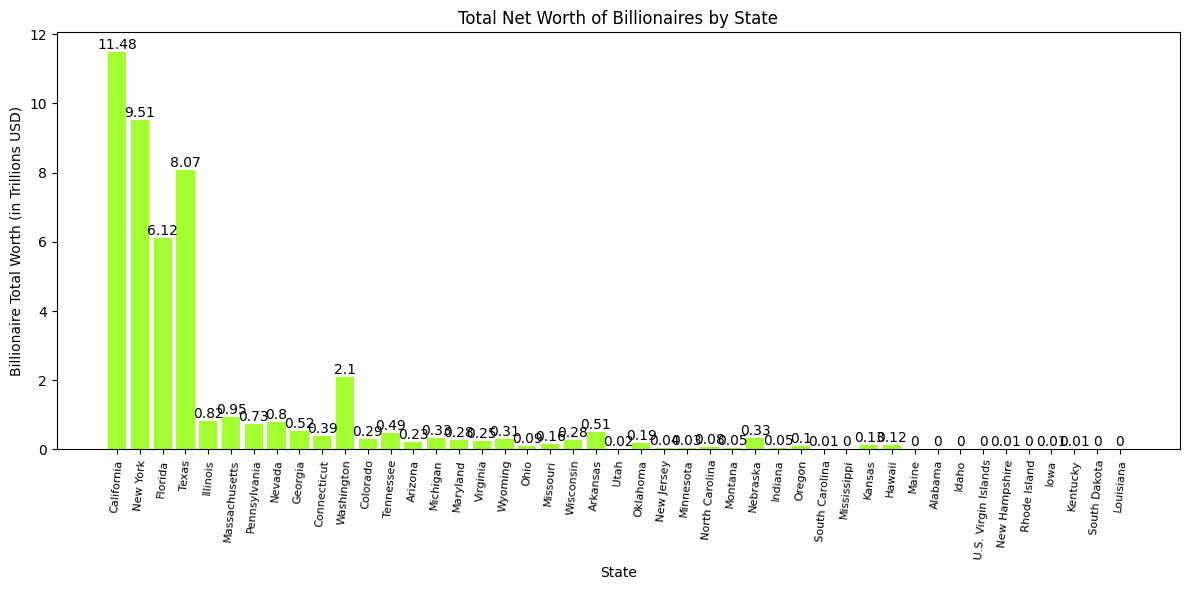

In [179]:
# Collect data to plot
state_labels = us_state_grouped.select("state").rdd.flatMap(lambda x: x).collect()
state_values = us_state_grouped.select("total_worth_tril").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
state_labels = [label if label else 'Unknown' for label in state_labels]
state_values = [value if value else 0 for value in state_values]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(state_labels, state_values, color='#A4FF30')
plt.xlabel('State')
plt.ylabel('Billionaire Total Worth (in Trillions USD)')
plt.title('Total Net Worth of Billionaires by State')

for bar, value in zip(bars, state_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=85, fontsize=8)
plt.tight_layout()
plt.show()

**California, New York, Florida** and **Texas** have the highest billionaire's total worth, much more than the entire country combined

#### U3 - What is the average **age** of billionaires for each **state**?

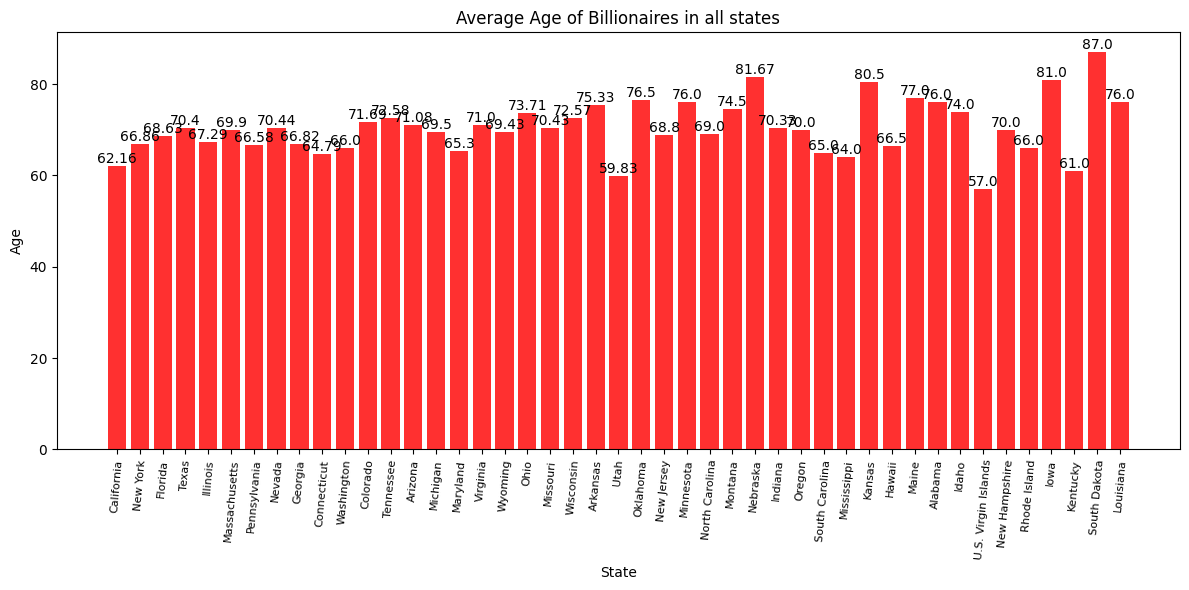

In [181]:
# Collect data to plot
state_labels = us_state_grouped.select("state").rdd.flatMap(lambda x: x).collect()
state_values = us_state_grouped.select("avg_age").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
state_labels = [label if label else 'Unknown' for label in state_labels]
state_values = [value if value else 0 for value in state_values]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(state_labels, state_values, color='#FF3030')
plt.xlabel('State')
plt.ylabel('Age')
plt.title('Average Age of Billionaires in all states')

for bar, value in zip(bars, state_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=85, fontsize=8)
plt.tight_layout()
plt.show()

**Virgin Islands** has the number one spot for the state with the youngest average age of billionaire, with Average Age of 57.

Followed by **Utah** with 59.83 as the average Age

The state with the highest average age of billionaire is **South Dakota**, at the age average of 87

#### U4 - What **state** has the most **selfMade** billionaires?

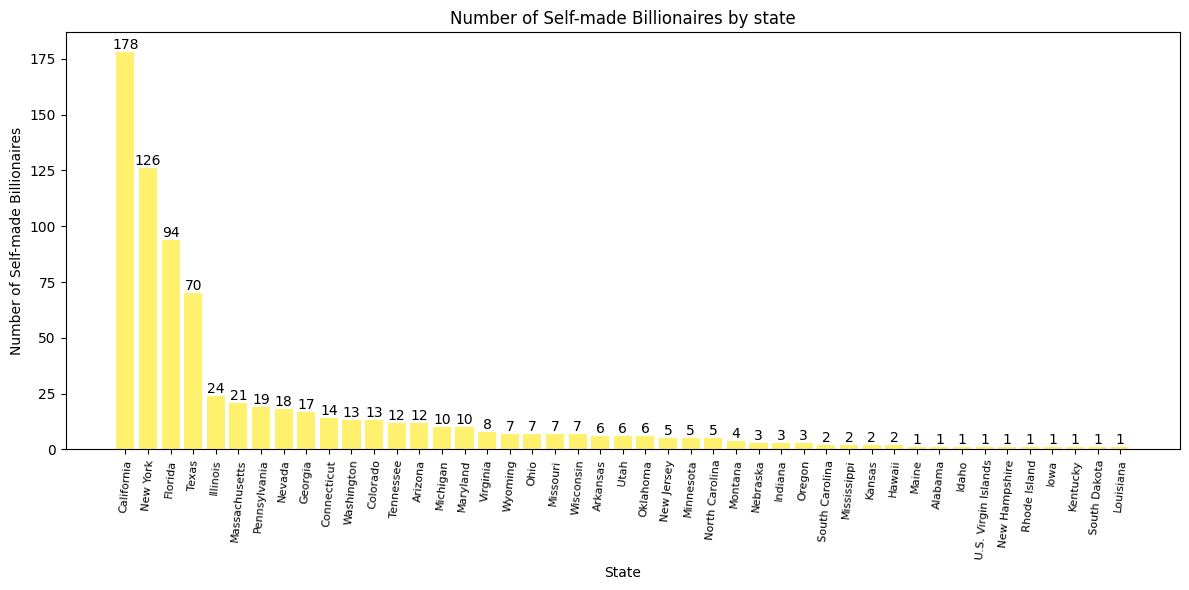

In [187]:
# Collect data to plot
state_labels = us_state_grouped.select("state").rdd.flatMap(lambda x: x).collect()
state_values = us_state_grouped.select("self_made_counter").rdd.flatMap(lambda x: x).collect()

# Remove None values from city_labels and city_values
state_labels = [label if label else 'Unknown' for label in state_labels]
state_values = [value if value else 0 for value in state_values]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(state_labels, state_values, color='#FFF06E')
plt.xlabel('State')
plt.ylabel('Number of Self-made Billionaires')
plt.title('Number of Self-made Billionaires by state')

for bar, value in zip(bars, state_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=85, fontsize=8)
plt.tight_layout()
plt.show()

Every single billionaires in the state of **California** is **self-made**

### Countries Statistic Comparison

#### Get statistic of every country based on **Billionaire Dataset**

First, we get all the feature columns those were depended entirely on **country**

*Columns: cpi_change_country, gdp_country, gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, population_country*

In [ ]:
# Get the dataset with all columns related to country
sql_country_stat = ''' SELECT country, ROUND(AVG(cpi_change_country), 2) AS cpi_change_country,
ROUND(AVG(REPLACE(REPLACE(gdp_country, ',', ''), '$', '')) / 1000000, 2) AS gdp_country,
ROUND(AVG(gross_tertiary_education_enrollment), 2) AS gross_tertiary_education_enrollment,
ROUND(AVG(gross_primary_education_enrollment_country), 2) AS gross_primary_education_enrollment_country,
ROUND(AVG(life_expectancy_country), 2) AS life_expectancy_country,
ROUND(AVG(tax_revenue_country_country), 2) AS tax_revenue_country_country,
ROUND(AVG(total_tax_rate_country), 2) AS total_tax_rate_country,
ROUND(AVG(population_country), 0) AS population_country
FROM bill_table
WHERE gdp_country IS NOT NULL
GROUP BY country '''
country_stat = spark.sql(sql_country_stat).orderBy(col('gdp_country').desc())
country_stat.show(5)

+--------------+------------------+-----------+-----------------------------------+------------------------------------------+-----------------------+---------------------------+----------------------+------------------+
|       country|cpi_change_country|gdp_country|gross_tertiary_education_enrollment|gross_primary_education_enrollment_country|life_expectancy_country|tax_revenue_country_country|total_tax_rate_country|population_country|
+--------------+------------------+-----------+-----------------------------------+------------------------------------------+-----------------------+---------------------------+----------------------+------------------+
| United States|               7.5|  2.14277E7|                               88.2|                                     101.8|                   78.5|                        9.6|                  36.6|      3.28239523E8|
|         China|               2.9|    1.991E7|                               50.6|                                 

In [ ]:
# Check null for Country Statistic Dataframe
null_counts = {col_name: country_stat.where(col(col_name).isNull()).count() for col_name in country_stat.columns}
print(null_counts)

{'country': 0, 'cpi_change_country': 4, 'gdp_country': 0, 'gross_tertiary_education_enrollment': 2, 'gross_primary_education_enrollment_country': 1, 'life_expectancy_country': 2, 'tax_revenue_country_country': 3, 'total_tax_rate_country': 2, 'population_country': 0}


#### Build **Nested Horizontal Bar Chart** to compare the number between top 10 countries in each feature column

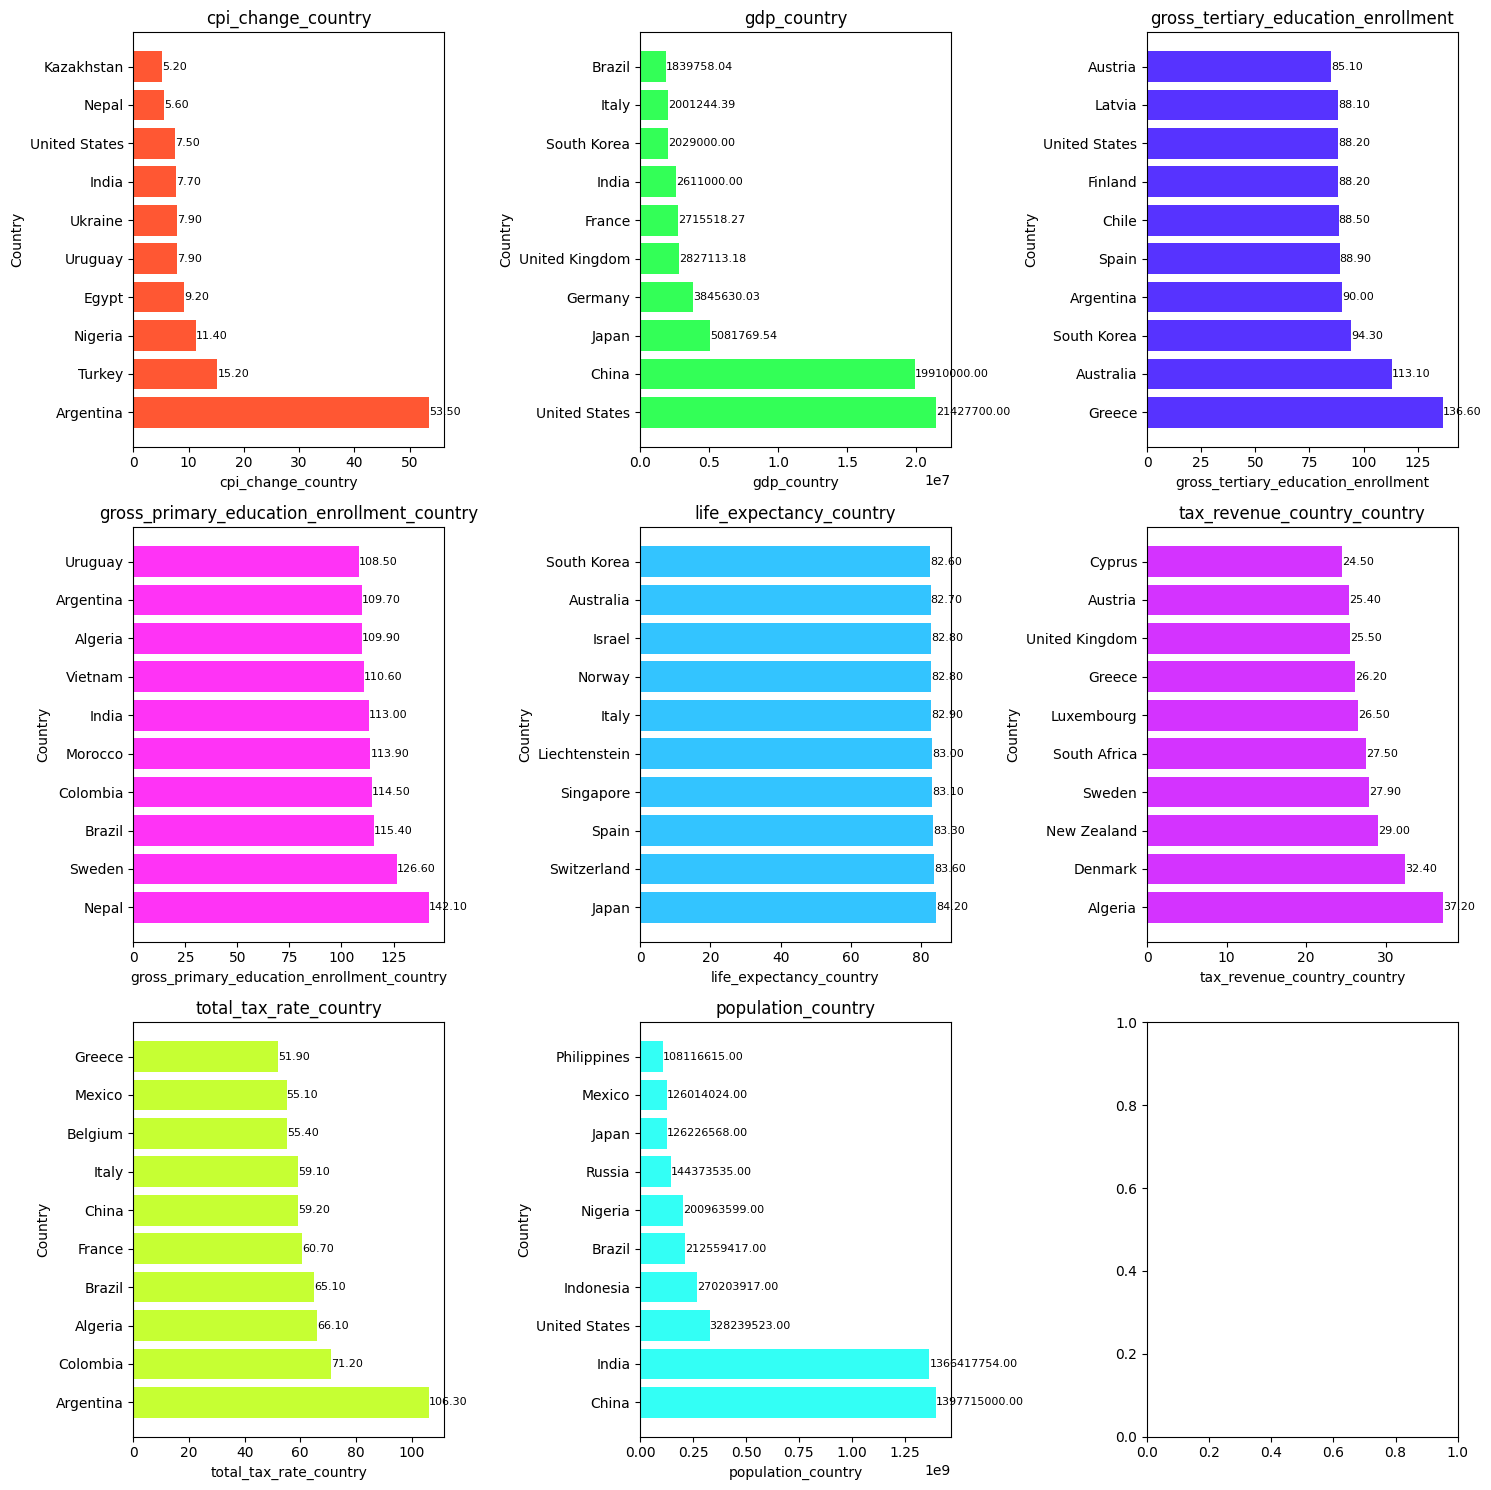

In [ ]:
# Selecting columns except for 'country'
columns_to_compare = country_stat.columns[1:]  # Exclude 'country'

# Get the top 10 highest values for each column
top_10 = {col: country_stat.orderBy(col, ascending=False).limit(10).toPandas() for col in columns_to_compare}

# Nesting charts in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Bar colors for each chart
colors = ['#FF5733', '#33FF57', '#5733FF', '#FF33F6', '#33C4FF', '#D433FF', '#C6FF33', '#33FFF5']

for idx, (col, color) in enumerate(zip(columns_to_compare, colors)):
    ax = axs[idx // 3, idx % 3]
    data = top_10[col]
    bars = ax.barh(data['country'], data[col], color=color)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Country')

    # Add values on top of bars
    for bar, value in zip(bars, data[col]):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}',
                ha='left', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

## Machine Learning Applications

### Task 1: Use K-Means clustering method for **latitude** and **longtitude** of billionaire's country.

In [ ]:
# Clustering
from pyspark.mllib.clustering import KMeans

In [ ]:
# Get data
geography_data = bill_df.rdd.map(lambda row: (row['latitude_country'], row['longitude_country']))
# Filter the "None" values from the list of coordinate
geography_data = geography_data.filter(lambda x: x[0] is not None and x[1] is not None)

In [ ]:
# Create a function to evaluate the K-means Model
from math import sqrt
def error(point):
  center = model.centers[model.predict(point)]
  return sqrt(sum([x**2 for x in (point - center)]))

In [ ]:
# Find the best number of K for K-means clustering using the function
wssse_list = []

for knode in range(1, 130):
  model = KMeans.train(geography_data, k=knode, maxIterations = 10)
  model.clusterCenters

  WSSSE = geography_data.map(lambda point: error(point)).reduce(lambda x, y: x+y)
  wssse_list.append((knode, WSSSE))

In [ ]:
# Use the max function with a custom key to get the tuple with the highest second value
best_kmeans = min(wssse_list, key=lambda x: x[1])

print("Tuple with the value:", best_kmeans)
print()
print(f"The value {best_kmeans[0]} for K in K-means clustering is the best one, with WSSSE score of {best_kmeans[1]}")

Tuple with the value: (127, 46.28594208828282)

The value 127 for K in K-means clustering is the best one, with WSSSE score of 46.28594208828282


We can see that **k = 107** is the best value for the K-Means clustering model of this coordinate data.




In [ ]:
# Use 107 to re-train the model for visualization
final_model = KMeans.train(geography_data, k=107, maxIterations = 10)

In [ ]:
# Visualizing Cluster
import pandas as pd
geodata = spark.createDataFrame(geography_data, schema=["col1","col2"])
geopandas = geodata.toPandas()
cluster_center_pandas = pd.DataFrame(final_model.clusterCenters, columns=["col1","col2"])
cluster_center_pandas.head()

,col1,col2
0,46.822275,8.243884
1,37.090240,-95.712891
2,35.861660,104.195397
3,-35.675147,-71.542969
4,-0.789275,113.921327


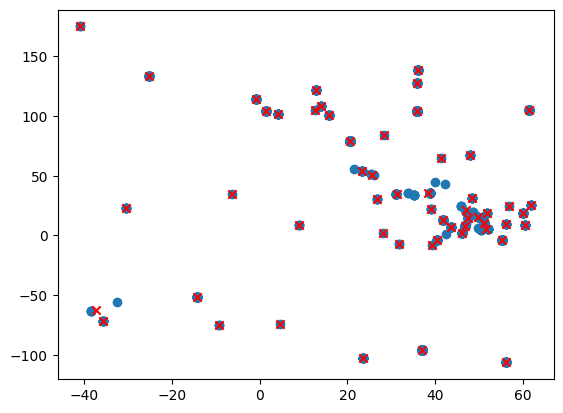

In [ ]:
# MatPlotlib
import matplotlib.pyplot as plt
plt.scatter(geopandas['col1'], geopandas['col2'])
plt.scatter(cluster_center_pandas['col1'], cluster_center_pandas['col2'], color='red', marker='x')

###Task 2: **Regression Analysis** - Predict the **finalWorth** or net worth based on various features like *age, industries, gender, country, etc.*

In [196]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [191]:
# Selecting relevant columns for regression analysis
selected_cols = ['age', 'industries', 'gender', 'country', 'finalWorth']

# Dropping rows with missing values for simplicity
bill_df_filtered = bill_df[selected_cols].na.drop()

# Feature Engineering: Convert categorical variables to numerical with StringIndexer
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index").fit(bill_df_filtered)
    for column in ['gender', 'industries', 'country']
]

pipeline = Pipeline(stages=indexers)
indexed = pipeline.fit(bill_df_filtered).transform(bill_df_filtered)

# Assemble features
assembler = VectorAssembler(
    inputCols=['age', 'gender_index', 'industries_index', 'country_index'],
    outputCol='features')

output = assembler.transform(indexed)

In [192]:
# Train-test split
(train_data, test_data) = output.randomSplit([0.8, 0.2], seed=123)

In [193]:
# Linear Regression Model
lr = LinearRegression(featuresCol='features', labelCol='finalWorth')

In [194]:
# Train the model
lr_model = lr.fit(train_data)

In [195]:
# Predictions
predictions = lr_model.transform(test_data)

In [197]:
# Evaluation
evaluator = RegressionEvaluator(
    labelCol="finalWorth", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error (RMSE)
rmse = evaluator.evaluate(predictions)
print("Root Mean Square Error (RMSE) on test data = %g" % rmse)

# R-Squared
r2 = evaluator.setMetricName("r2").evaluate(predictions)
print("R-squared (R2) on test data = %g" % r2)

# Adjusted R-Squared
num_instances = predictions.count()
num_features = len(['age', 'gender_index', 'industries_index', 'country_index'])
adj_r2 = 1 - (1 - r2) * ((num_instances - 1) / (num_instances - num_features - 1))
print("Adjusted R-squared (Adj R2) on test data = %g" % adj_r2)

Root Mean Square Error (RMSE) on test data = 12270.4
R-squared (R2) on test data = 0.00323268
Adjusted R-squared (Adj R2) on test data = -0.00444953


*This task is still in Experimental processes, to be continued..*

## **THE END.**

In [209]:
print(" _________________ ")
print("|                 |")
print("|     tuanx18     |")
print("|     //.\\\\\.     |")
print("|   ///    \\\\     |")
print("|   |  O  o  |    |")
print("|   |        |    |")
print("|   |   <>   |    |")
print("|\   \\______/     |")
print("| \____ |         |")
print("|      \| \       |")
print("|       |   \     |")
print("|       |     \   |")
print("|_______|_________|")
print("Thanks for viewing my project!")
print("Author: tuanx18")

 _________________ 
|                 |
|     tuanx18     |
|     //.\\\.     |
|   ///    \\     |
|   |  O  o  |    |
|   |        |    |
|   |   <>   |    |
|\   \______/     |
| \____ |         |
|      \| \       |
|       |   \     |
|       |     \   |
|_______|_________|
Thanks for viewing my project!
Author: tuanx18
